In [1]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from torchvision.utils import save_image
from torchmetrics.regression import PearsonCorrCoef
from eofs.standard import Eof
from torch import nn


In [2]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from torchvision.utils import save_image
from torchmetrics.regression import PearsonCorrCoef
from eofs.standard import Eof
from torch import nn
def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()

#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map_metric(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Spectral')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()



def EOF(Data, lat, lon):
    wgts   = np.cos(np.deg2rad(lat))
    wgts   = wgts.reshape(len(wgts), 1)
    #solver1 = Eof(np.array(ser_original[6]), weights=wgts)

    coslat = np.cos(np.deg2rad(lat))
    wgts = np.sqrt(coslat)[..., np.newaxis]
    solver =Eof(Data,weights=wgts)
    eof1=solver.eofs()

    pc=solver.pcs(pcscaling=1)
    varfrac=solver.varianceFraction()
    lambdas=solver.eigenvalues()


    parallels = np.arange(-90,90,20)
    meridians = np.arange(-180,180,40)

    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)

    cs = m.contourf(x,y,eof1[0,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    m.drawparallels(parallels,labels=[1,0,0,0])
    m.drawmeridians(meridians,labels=[1,0,0,1])

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF1', fontsize=15)  
    plt.show()
    
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,0], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    #plt.savefig('../Data/output/MIROC_Observed/EOF/PC_Amplitude_gen_extend_'+str(i)+'.png')
    plt.show()
    


In [3]:
import xarray as xr
vae_anom_ds=xr.open_dataset('../Data/output/GISS/Conv_VAE_output_GISS_anomaly.nc')#('../Data/output/GISS/gen_anom.nc')
diffusion_anom_ds=xr.open_dataset('../Data/output/GISS/Diffusion_output_GISS_anomaly.nc')
gan_anom_ds=xr.open_dataset('../Data/output/GISS/gen_anom.nc')
ori_anom_ds=xr.open_dataset('../Data/output/GISS/giss_anom.nc')
obs_anom_ds=xr.open_dataset('../Data/output/GISS/cobe_anom.nc')

vae_anom_ds=vae_anom_ds.sel(time=slice(0,5999))
gan_anom_ds=gan_anom_ds.sel(years=slice(0,499))
diffusion_anom_ds=diffusion_anom_ds.sel(time=slice(0,5999))

# lat_sst=vae_anom_ds.lat.values
# lon_sst=vae_anom_ds.lon.values


# import xarray as xr
# vae_anom_ds=xr.open_dataset('../Data/output/MIROC6/gen_anom.nc')
# gen_finetune_anom_ds=xr.open_dataset('../Data/output/MIROC_COBE/gen_anom.nc')
# ori_anom_ds=xr.open_dataset('../Data/output/MIROC6/miroc6_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/MIROC_COBE/cobe_anom.nc')


# lat_sst=vae_anom_ds.lat.values
# lon_sst=gen_anom_ds.lon.values

# import xarray as xr
# gen_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/EC_Earth/Without_Fine_Tune/gen_anom_reshape.nc',decode_times=False)
# gan_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/EC_Earth/gen_anom_reshape.nc',decode_times=False)
# ori_anom_ds=xr.open_dataset('../Data/output/EC_Earth3_CC/ori_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/MIROC6/cobe_anom.nc')


lat_sst=vae_anom_ds.lat.values
lon_sst=vae_anom_ds.lon.values

In [4]:
import pandas as pd


In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 20 22:18:26 2021

@author: Devabrat
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import pylab as pl
from scipy import signal
import matplotlib.pyplot as plt
import scipy.stats
from netCDF4 import Dataset

def cal_power_spect(data):
    #data=N_EP_gen#np.loadtxt('iod.txt', dtype=np.float32)
    #data=data_whole.variables['temp'][:]
    #data=data.reshape(data.shape[0],)

    nd=len(data)


    nrho=len(data)
    rho=0
    sommesup=0
    sommeinf=0
    for i in range(1,nrho):
        j=i-1
        sommesup=sommesup+(data[i]*data[j])
        sommeinf=sommeinf+((data[j]**2))

    rho=sommesup/sommeinf

    nt=len(data)

    rzero=0
    redtab=[]
    red=[]

    srho=np.sqrt(1-rho**2)

    nsim=1500

    red_sum=np.zeros((nd, nsim))
    for i in range(nsim):
    
        white=srho*np.random.randn(1)
        red_sum[0,i]=rho*rzero+white
        
        for j in range(1,nd):
            white=srho*np.random.randn(1)
            red_sum[j,i]=rho*red_sum[j-1,i]+white
            
    redtab.append(red_sum)
        
    redtab=np.array(redtab)
    redtab=redtab.reshape(nd,nsim)


    fs=1
    f, Po = signal.periodogram(data, fs, detrend='linear')

    npo=len(Po)
    Po=Po.reshape(npo,)

    Ax=np.sum(Po)/npo

    red2=[]
    specred=np.zeros((npo,nsim))

    for i in range(nsim):
        red2=redtab[:,i]
        red2m=np.sum(red2)/nd
        red2n=red2-red2m
        fs=1
        fr, Pr = signal.periodogram(red2n, fs, detrend='linear')  #detrend = linear
        npr=len(Pr)
        Pr=Pr.reshape(npr,)
        
        Ar=np.sum(Pr)/npr
        Pr=Pr*(Ax/Ar)
        specred[:,i]=Pr
        
    Mpr=0
    Mspecred=[]
    for i in range(npr):
        Mpr=specred[i,1]
        for j in range(1,nsim):
            Mpr=Mpr+specred[i,j]
        
        Mpr=np.sum(Mpr)/nsim
        Mspecred.append(Mpr)

    Mspecred=np.array(Mspecred)


    period_Po=1/f
    period_Pr=1/fr


    n85=round(1500*85/100)
    n90=round(1500*90/100)
    n95=round(1500*95/100)
    n99=round(1500*99/100)


    tabvecsort=np.zeros((npr,nsim))
    for i in range(npr):
        vec=specred[i,:]
        tabvecsort[i,:]=np.sort(vec)
        
    tabMC=np.zeros((npr,4))

    for i in range(npr):
        tabMC[i,0]=tabvecsort[i,n85]
        tabMC[i,1]=tabvecsort[i,n90]
        tabMC[i,2]=tabvecsort[i,n95]
        tabMC[i,3]=tabvecsort[i,n99]
        

        
    plot=np.zeros((Po.shape[0],3), dtype=np.float32)

    plot[:,0]=period_Po
    plot[:,1]=f*Po
    plot[:,2]=f*tabMC[:,2]
    return plot





In [ ]:

vae_anom_ds_3mo_avg = vae_anom_ds.rolling(time=3, center=True).mean().fillna(0)
diffusion_anom_ds_3mo_avg = diffusion_anom_ds.rolling(time=3, center=True).mean().fillna(0)
da=xr.Dataset(data_vars={'sst': (['time', 'lat', 'lon'], gan_anom_ds.sst.values.reshape(6000,48,144))}, coords={'time': diffusion_anom_ds.time, 'lat': diffusion_anom_ds.lat, 'lon': diffusion_anom_ds.lon})
gan_anom_ds_3mo_avg = da.rolling(time=3, center=True).mean().fillna(0)
da=xr.Dataset(data_vars={'sst': (['time', 'lat', 'lon'], ori_anom_ds.sst.values.reshape(1980,48,144))}, coords={'time': diffusion_anom_ds.time[:1980], 'lat': diffusion_anom_ds.lat, 'lon': diffusion_anom_ds.lon})
ori_anom_ds_3mo_avg = da.rolling(time=3, center=True).mean().fillna(0)
#da=xr.Dataset(data_vars={'sst': (['time', 'lat', 'lon'], obs_anom_ds.sst.values.reshape(2088,48,144))}, coords={'time': diffusion_anom_ds.time[:2088], 'lat': diffusion_anom_ds.lat, 'lon': diffusion_anom_ds.lon})
obs_anom_ds_3mo_avg = obs_anom_ds.rolling(time=3, center=True).mean().fillna(0)

/home/deepayan/anaconda3/envs/test/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  self.index_grouper = pd.Grouper(


KeyError: "Window dimensions ('mon',) not found in Dataset dimensions ('time', 'lat', 'lon')"

/tmp/ipykernel_788203/3234104956.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(Data, weights=wgts)
/tmp/ipykernel_788203/3234104956.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(Data, weights=wgts)
/tmp/ipykernel_788203/3234104956.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(Data, weights=wgts)
/tmp/ipykernel_788203/3234104956.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(Data, weights=wgts)
/tmp/ipykernel_788203/3234104956.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(Data, weights=wgts)


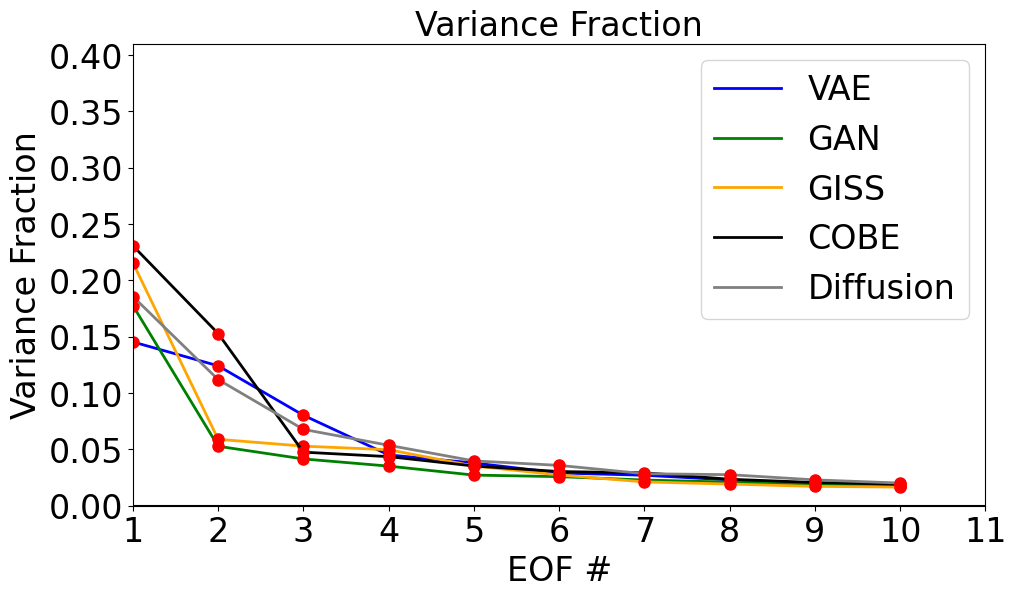

In [21]:

lat = lat_sst
lon = lon_sst

varfrac = Eof_var(vae_anom_ds_3mo_avg['sst'].values, lat, lon)
plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2,label='VAE', color='b')
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)




varfrac = Eof_var(gan_anom_ds_3mo_avg['sst'].values.reshape(6000,48,144), lat, lon)

eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2,label='GAN', color='g')
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)

varfrac = Eof_var(ori_anom_ds_3mo_avg['sst'].values.reshape(1980,48,144), lat, lon)

eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2,label='GISS', color='orange')
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)

varfrac = Eof_var(obs_anom_ds_3mo_avg['sst'].values.reshape(2088,48,144), lat, lon)

eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2,label='COBE', color='black')
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)

varfrac = Eof_var(diffusion_anom_ds_3mo_avg['sst'].values, lat, lon)

eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2,label='Diffusion', color='gray')
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), .40+0.01)
plt.title('Variance Fraction', fontsize=24) 
plt.legend(fontsize=24, loc='upper right') 
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

In [23]:
vae_anom_ds_12mo_avg = vae_anom_ds.rolling(time=12, center=False).mean().fillna(0)
diffusion_anom_ds_12mo_avg = diffusion_anom_ds.rolling(time=12, center=True).mean().fillna(0)
gan_anom_ds_12mo_avg = gan_anom_ds.rolling(mon=3, center=True).mean().fillna(0)
ori_anom_ds_12mo_avg = ori_anom_ds.rolling(mon=3, center=True).mean().fillna(0)
obs_anom_ds_12mo_avg = obs_anom_ds.rolling(mon=3, center =True).mean().fillna(0)

In [6]:
import pandas as pd
import xarray as xr
vae_anom_ds=xr.open_dataset('../Data/output/GISS/Conv_VAE_output_GISS_anomaly.nc')#('../Data/output/GISS/gen_anom.nc')
diffusion_anom_ds=xr.open_dataset('../Data/output/GISS/Diffusion_output_GISS_anomaly.nc')
gan_anom_ds=xr.open_dataset('../Data/output/GISS/gen_anom.nc')
ori_anom_ds=xr.open_dataset('../Data/output/GISS/giss_anom.nc')
obs_anom_ds=xr.open_dataset('../Data/output/GISS/cobe_anom.nc')

vae_anom_ds=vae_anom_ds.sel(time=slice(0,5999))
gan_anom_ds=gan_anom_ds.sel(years=slice(0,499))
diffusion_anom_ds=diffusion_anom_ds.sel(time=slice(0,5999))


lat_sst=vae_anom_ds.lat.values
lon_sst=vae_anom_ds.lon.values

In [7]:
import numpy as np
from sklearn.utils import shuffle
import torch
import xarray as xr
from scipy.signal import detrend
import netCDF4 as nc
import numpy as np



    #trY_SST_ds=nc.Dataset("../Data/CMIP6-SST/GISS-E2-1-H_historical_1850_2014.nc")
trY_SST_ds=xr.open_dataset("../Data/CMIP6-SST/GISS-E2-1-H_historical_1850_2014.nc")#"../Data/tos_GFDL_resize_mask.nc")
#trY_SST_ds=xr.open_dataset("../Data/CMIP6-SST/MIROC6_historical_1850_2014.nc")
trY_SST_ds=trY_SST_ds.fillna(0)
trY_SST=trY_SST_ds['sst'].values


# trY_SST_anom=trY_SST-np.expand_dims(trY_SST.mean(1),1)
trY_SST_detrended = detrend(trY_SST,axis=1) # Detrending trY_SST

trY_SST_anom_ds=trY_SST_ds.copy(deep=True)
trY_SST_anom_ds['sst'] = (('ensemble','years','mon','lat','lon'), trY_SST_detrended)
ori_anom_ds=trY_SST_anom_ds.sel(ensemble='tos_Omon_GISS-E2-1-H_historical_r10i1p1f1')
ori_anom_ds


<xarray.Dataset> Size: 109MB
Dimensions:   (years: 165, mon: 12, lat: 48, lon: 144)
Coordinates:
    ensemble  <U41 164B 'tos_Omon_GISS-E2-1-H_historical_r10i1p1f1'
  * years     (years) int32 660B 1850 1851 1852 1853 ... 2011 2012 2013 2014
  * mon       (mon) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * lat       (lat) float64 384B -88.12 -84.38 -80.62 ... 80.62 84.38 88.12
  * lon       (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    sst       (years, mon, lat, lon) float64 109MB 0.0 0.0 ... 0.02053 0.02033

In [8]:
trX_SST_ds=xr.open_dataset("../Data/COBE_SST_resize.nc")
trX_SST_ds=trX_SST_ds.fillna(0)

trX_SST_ds=trX_SST_ds.fillna(0)
trX_SST=trX_SST_ds['sst'].values
trX_SST.shape

(2099, 48, 144)

In [15]:
trX_SST_ds=xr.open_dataset("../Data/COBE_SST_resize.nc")
trX_SST_ds=trX_SST_ds.fillna(0)

trX_SST_ds=trX_SST_ds.fillna(0)
trX_SST=trX_SST_ds['sst'].values


# trY_SST_anom=trY_SST-np.expand_dims(trY_SST.mean(1),1)
trX_SST_detrended = detrend(trX_SST,axis=0) # Detrending trY_SST

trX_SST_anom_ds=trX_SST_ds.copy(deep=True)
trX_SST_anom_ds['sst'] = (('time','lat','lon'), trX_SST_detrended)


obs_anom_ds=trX_SST_anom_ds

In [16]:
vae_monthly_sst=vae_anom_ds.sst.values.copy()
vae_yearly_sst=vae_monthly_sst.reshape(500,12,48,144).mean(axis=1) # Check validity of this step
vae_yearly_sst.shape
diffusion_monthly_sst=diffusion_anom_ds.sst.values.copy()
diffusion_yearly_sst=diffusion_monthly_sst.reshape(500,12,48,144).mean(axis=1) # Check validity of this step
diffusion_yearly_sst.shape

gan_monthly_sst=gan_anom_ds.sst.values.copy()
gan_yearly_sst=gan_monthly_sst.mean(1)
gan_yearly_sst.shape

ori_monthly_sst=ori_anom_ds#.sel(years=slice(1990,2014))
ori_yearly_sst=ori_monthly_sst.mean(dim='mon').sst.values.copy()


obs_yearly_sst=obs_anom_ds.resample(time='Ys').mean().sst.values.copy()#.sel(time=slice('1990-01-01', '2014-12-31')).sst.values.copy()
obs_yearly_sst

/home/deepayan/anaconda3/envs/test/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  self.index_grouper = pd.Grouper(


array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.07777774,  0.0991008 ,  0.12281767, ...,  0.03074925,
          0.04164793,  0.05878003],
        [ 0.04075649,  0.04277802,  0.0442874 , ...,  0.02879845,
          0.03364329,  0.0372903 ],
        [ 0.03193885,  0.03187357,  0.03093518, ...,  0.02801615,
          0.03067177,  0.03151634]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.07760714,  0.0989323 ,  0.12236188, ...,  

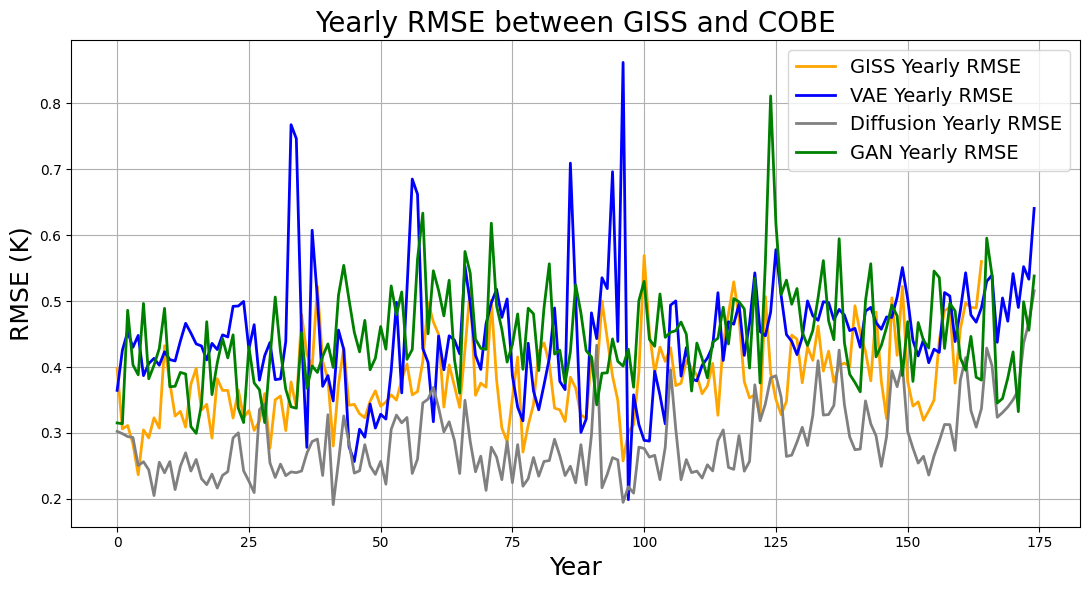

In [82]:
from sklearn.metrics import mean_squared_error

# Calculate yearly RMSE between ori_yearly_sst and obs_yearly_sst
annual_rmse_ori = np.sqrt(np.mean((ori_yearly_sst - obs_yearly_sst[:165])**2, axis=(-2, -1)))

years = np.arange(0, 0 + len(annual_rmse_vae))
# Calculate yearly RMSE between vae_yearly_sst and obs_yearly_sst
annual_rmse_vae = np.sqrt(np.mean((vae_yearly_sst[:175] - obs_yearly_sst)**2, axis=(-2, -1)))
# Calculate yearly RMSE between diffusion_yearly_sst and obs_yearly_sst
annual_rmse_diffusion = np.sqrt(np.mean((diffusion_yearly_sst[:175] - obs_yearly_sst)**2, axis=(-2, -1)))
# Calculate yearly RMSE between gan_yearly_sst and obs_yearly_sst
annual_rmse_gan = np.sqrt(np.mean((gan_yearly_sst[:175] - obs_yearly_sst)**2, axis=(-2, -1)))
plt.figure(figsize=(11,6))
plt.plot(years[:len(annual_rmse_ori)], annual_rmse_ori, linewidth=2, label='GISS Yearly RMSE', color='orange')
plt.plot(years[:len(annual_rmse_vae)], annual_rmse_vae, linewidth=2, label='VAE Yearly RMSE', color='b')
plt.plot(years[:len(annual_rmse_diffusion)], annual_rmse_diffusion, linewidth=2, label='Diffusion Yearly RMSE', color='gray')
plt.plot(years[:len(annual_rmse_gan)], annual_rmse_gan, linewidth=2, label='GAN Yearly RMSE', color='g')

plt.xlabel('Year', fontsize=18)
plt.ylabel('RMSE (K)', fontsize=18)
plt.title('Yearly RMSE between GISS and COBE', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:


ori_monthly_sst=ori_anom_ds.sel(years=slice(1990,2014))
ori_yearly_sst=ori_monthly_sst.mean(dim='mon').sst.values.copy()


obs_yearly_sst=obs_anom_ds.resample(time='Ys').mean().sel(time=slice('1990-01-01', '2014-12-31')).sst.values.copy()
obs_yearly_sst

/home/deepayan/anaconda3/envs/test/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  self.index_grouper = pd.Grouper(


array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 9.58928689e-02,  1.11596644e-01,  1.16784357e-01, ...,
          7.97285363e-02,  8.70677829e-02,  9.80949402e-02],
        [ 1.48372352e-03, -4.61736834e-03, -9.11620259e-03, ...,
          1.73938721e-02,  1.35407848e-02,  7.74036348e-03],
        [-2.06161533e-02, -2.07977202e-02, -2.10721102e-02, ...,
         -2.02875733e-02, -2.03875601e-02, -2.06141863e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

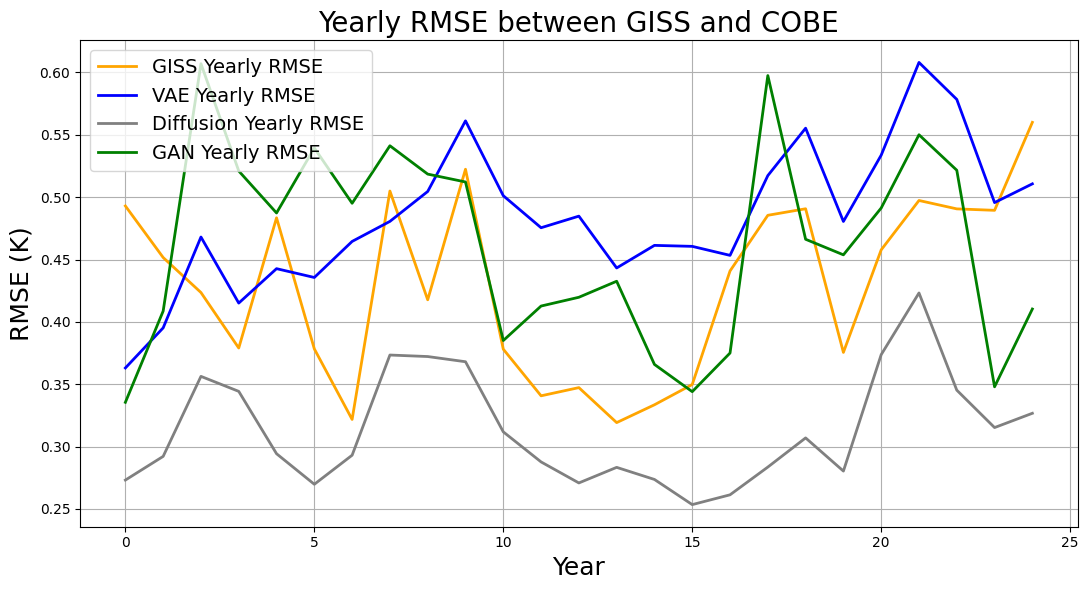

In [86]:
from sklearn.metrics import mean_squared_error
years = np.arange(0, 0 + len(annual_rmse_ori))
# Calculate yearly RMSE between ori_yearly_sst and obs_yearly_sst
annual_rmse_ori = np.sqrt(np.mean((ori_yearly_sst - obs_yearly_sst)**2, axis=(-2, -1)))
# Calculate yearly RMSE between vae_yearly_sst and obs_yearly_sst
annual_rmse_vae = np.sqrt(np.mean((vae_yearly_sst[:25] - obs_yearly_sst)**2, axis=(-2, -1)))
# Calculate yearly RMSE between diffusion_yearly_sst and obs_yearly_sst
annual_rmse_diffusion = np.sqrt(np.mean((diffusion_yearly_sst[:25] - obs_yearly_sst)**2, axis=(-2, -1)))
# Calculate yearly RMSE between gan_yearly_sst and obs_yearly_sst
annual_rmse_gan = np.sqrt(np.mean((gan_yearly_sst[:25] - obs_yearly_sst)**2, axis=(-2, -1)))
plt.figure(figsize=(11,6))
plt.plot(years[:len(annual_rmse_ori)], annual_rmse_ori, linewidth=2, label='GISS Yearly RMSE', color='orange')
plt.plot(years[:len(annual_rmse_vae)], annual_rmse_vae, linewidth=2, label='VAE Yearly RMSE', color='b')
plt.plot(years[:len(annual_rmse_diffusion)], annual_rmse_diffusion, linewidth=2, label='Diffusion Yearly RMSE', color='gray')
plt.plot(years[:len(annual_rmse_gan)], annual_rmse_gan, linewidth=2, label='GAN Yearly RMSE', color='g')

plt.xlabel('Year', fontsize=18)
plt.ylabel('RMSE (K)', fontsize=18)
plt.title('Yearly RMSE between GISS and COBE', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Trend (slope) for annual_rmse_vae: 0.0052835169893044685 RMSE/year
Trend (slope) for annual_rmse_diffusion: 0.0007478947135118337 RMSE/year
Trend (slope) for annual_rmse_gan: -0.0014765732334210322 RMSE/year
Trend (slope) for annual_rmse_ori: 0.002393188871163276 RMSE/year


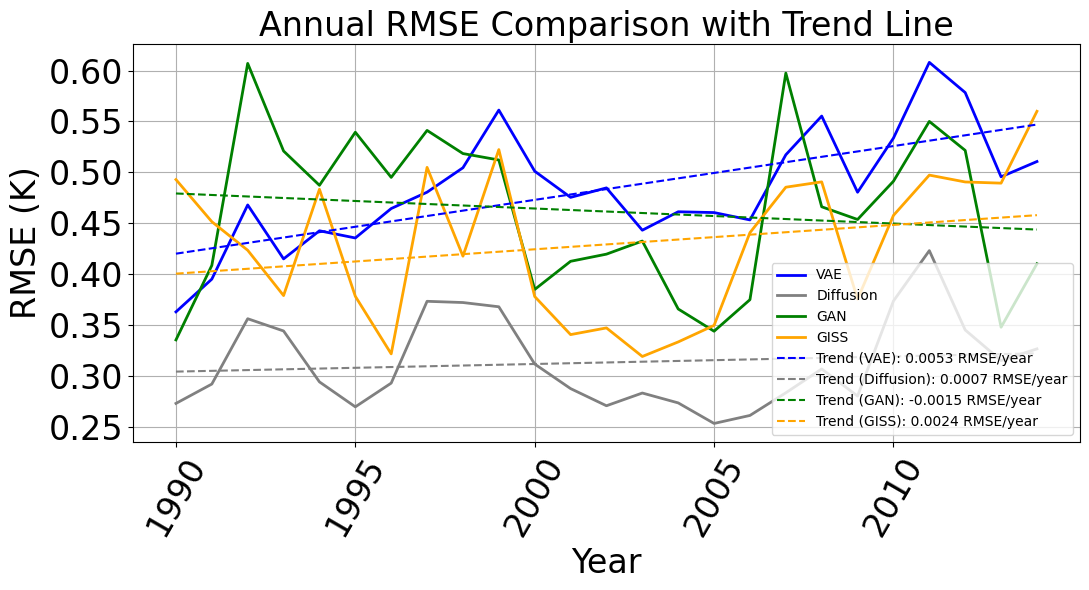

In [87]:
from scipy.stats import linregress

# Calculate linear trend for annual_rmse_vae
years = np.arange(1990, 1990 + len(annual_rmse_vae))
vae_slope, vae_intercept, r_value, p_value, std_err = linregress(years, annual_rmse_vae)

print(f"Trend (slope) for annual_rmse_vae: {vae_slope} RMSE/year")

# Calculate linear trend for annual_rmse_diffusion
diffusion_slope, diffusion_intercept, r_value, p_value, std_err = linregress(years, annual_rmse_diffusion)
print(f"Trend (slope) for annual_rmse_diffusion: {diffusion_slope} RMSE/year")

# Calculate linear trend for annual_rmse_gan
gan_slope, gan_intercept, r_value, p_value, std_err = linregress(years, annual_rmse_gan)
print(f"Trend (slope) for annual_rmse_gan: {gan_slope} RMSE/year")
# Calculate linear trend for annual_rmse_ori
ori_slope, ori_intercept, r_value, p_value, std_err = linregress(years[:165], annual_rmse_ori)
print(f"Trend (slope) for annual_rmse_ori: {ori_slope} RMSE/year")

#plot the trend line
plt.figure(figsize=(11,6))
plt.plot(range(1990, 2015), annual_rmse_vae, linewidth=2, label='VAE', color='b')
plt.plot(range(1990, 2015), annual_rmse_diffusion, linewidth=2, label='Diffusion', color='gray');
plt.plot(range(1990, 2015), annual_rmse_gan, linewidth=2, label='GAN', color='g');
plt.plot(range(1990, 2015), annual_rmse_ori, linewidth=2, label='GISS', color='orange');
plt.plot(years, vae_slope * years + vae_intercept, color='b', linestyle='--', label='Trend (VAE): {:.4f} RMSE/year'.format(vae_slope))
plt.plot(years, diffusion_slope * years + diffusion_intercept, color='gray', linestyle='--', label='Trend (Diffusion): {:.4f} RMSE/year'.format(diffusion_slope))
plt.plot(years, gan_slope * years + gan_intercept, color='g', linestyle='--', label='Trend (GAN): {:.4f} RMSE/year'.format(gan_slope))
plt.plot(years, ori_slope * years + ori_intercept, color='orange', linestyle='--', label='Trend (GISS): {:.4f} RMSE/year'.format(ori_slope))
# plt.axhline(1990, color='k')
plt.xticks(range(1990, 2015, 5), fontsize=24, rotation=60)
plt.yticks(fontsize=24)
plt.xlabel('Year', fontsize=24)
plt.ylabel('RMSE (K)', fontsize=24)
plt.legend(fontsize=10)
plt.title('Annual RMSE Comparison with Trend Line', fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.savefig('../Data/output/GISS/Annual_RMSE_Trend_12ma.png', dpi=300, bbox_inches='tight')
plt.show()

In [194]:
vae_anom_ds.sst.values.reshape(12000,48,144)[:2088,0,1].shape

(2088,)

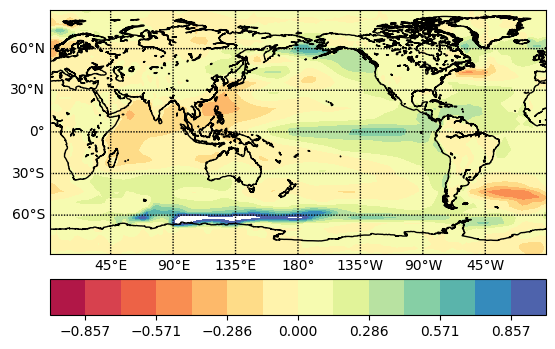

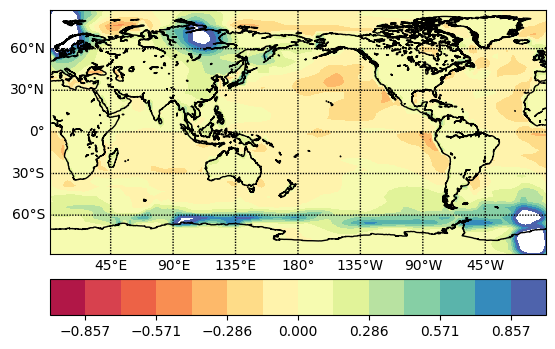

mean bias vae-observed = 0.10721721275792877
std bias vae-observed = 0.161208051858382


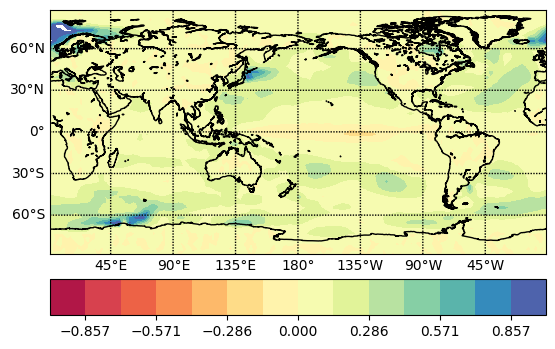

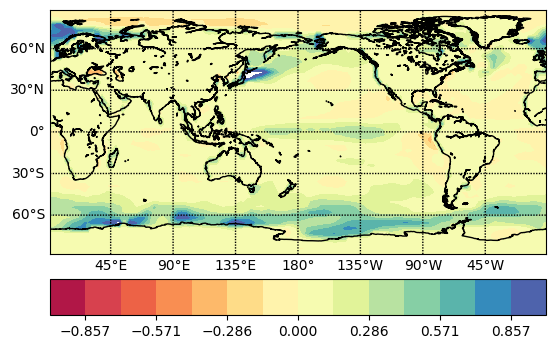

mean bias gan-observed = 0.1004372227699605
std bias gan-observed = 0.12611434409862138


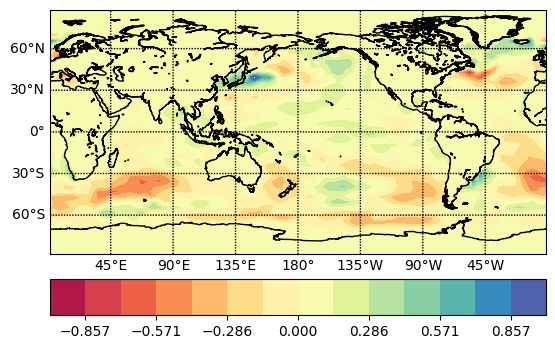

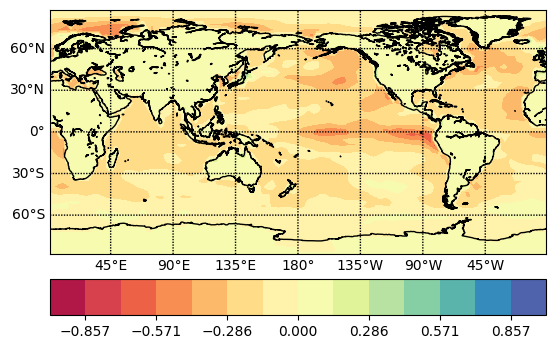

mean bias diffusion-observed = 0.08630261389203542
std bias diffusion-observed = 0.11689941095415567


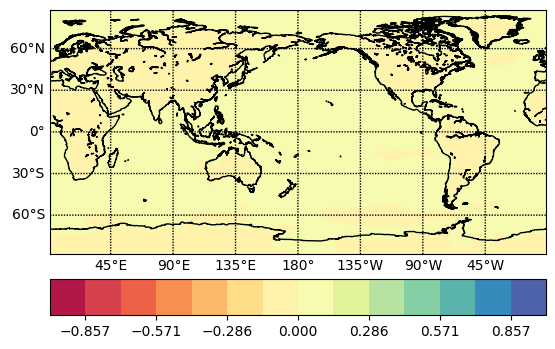

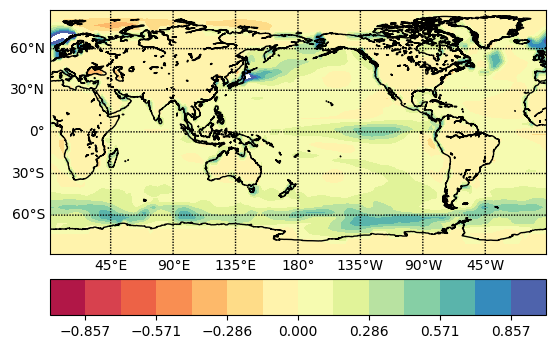

mean bias original-observed = 0.007692155263269164
std bias original-observed = 0.1088785850692755


<Figure size 640x480 with 0 Axes>

In [12]:
import xarray as xr

def plot_map_metric(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    #levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    levels = np.linspace(-1.0,1.0,15)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Spectral')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()



def calculate_mean_bias(time_series_1, time_series_2):
    """
    Calculates the mean bias between two time series data.

    Args:
      time_series_1: A numpy array or list representing the first time series.
      time_series_2: A numpy array or list representing the second time series.

    Returns:
      The mean bias between the two time series.
    """
    differences = np.array(time_series_1).mean() - np.array(time_series_2).mean()
    mean_bias = differences
    return mean_bias

def calculate_std_bias(time_series_1, time_series_2):
    """
    Calculates the standard deviation bias between two time series data.

    Args:
      time_series_1: A numpy array or list representing the first time series.
      time_series_2: A numpy array or list representing the second time series.

    Returns:
      The mean bias between the two time series.
    """
    differences = np.std(np.array(time_series_1)) - np.std(np.array(time_series_2))
    std_bias = differences
    return std_bias

# gen_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/GISS/Without_Fine_Tune/gen_anom_reshape.nc',decode_times=False)
# gan_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/GISS/gen_anom_reshape.nc',decode_times=False)
# ori_anom_ds=xr.open_dataset('../Data/output/GISS/giss_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/MIROC6/cobe_anom.nc')

lat_sst=vae_anom_ds.lat.values
lon_sst=vae_anom_ds.lon.values

_,lat_size,lon_size = vae_anom_ds.sst.values.reshape(6000,48,144)[:2099].shape

mean_bias_map = np.zeros((lat_size, lon_size))
std_bias_map = np.zeros((lat_size, lon_size))

for i in range(lat_size):
    for j in range(lon_size):
        mean_bias_map[i, j] = calculate_mean_bias(vae_anom_ds_3mo_avg.sst.values.reshape(6000,48,144)[:2088,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:2088,i,j])

        std_bias_map[i, j] = calculate_std_bias(vae_anom_ds_3mo_avg.sst.values.reshape(6000,48,144)[:2088,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:2088,i,j])
plot_map_metric(lon_sst, lat_sst, mean_bias_map, '../Data/output/GISS/bias_map_vae_obs_anomaly.png')
plot_map_metric(lon_sst, lat_sst, std_bias_map, '../Data/output/GISS/std_bias_map_vae_obs_anomaly.png')

print('mean bias vae-observed = '+str(np.nanmean(abs(mean_bias_map))))
print('std bias vae-observed = '+str(np.nanmean(abs(std_bias_map))))

mean_bias_map = np.zeros((lat_size, lon_size))
std_bias_map = np.zeros((lat_size, lon_size))

for i in range(lat_size):
    for j in range(lon_size):
        mean_bias_map[i, j] = calculate_mean_bias(gan_anom_ds_3mo_avg.sst.values.reshape(6000,48,144)[:2088,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:2088,i,j])
        std_bias_map[i, j] = calculate_std_bias(gan_anom_ds_3mo_avg.sst.values.reshape(6000,48,144)[:2088,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:2088,i,j])
plot_map_metric(lon_sst, lat_sst, mean_bias_map, '../Data/output/GISS/bias_map_gan_obs_anomaly.png')
plot_map_metric(lon_sst, lat_sst, std_bias_map, '../Data/output/GISS/std_bias_map_gan_obs_anomaly.png')


print('mean bias gan-observed = '+str(np.nanmean(abs(mean_bias_map))))
print('std bias gan-observed = '+str(np.nanmean(abs(std_bias_map))))

mean_bias_map = np.zeros((lat_size, lon_size))
std_bias_map = np.zeros((lat_size, lon_size))
for i in range(lat_size):
    for j in range(lon_size):
        mean_bias_map[i, j] = calculate_mean_bias(diffusion_anom_ds_3mo_avg.sst.values.reshape(6000,48,144)[:2088,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:2088,i,j])
        std_bias_map[i, j] = calculate_std_bias(diffusion_anom_ds_3mo_avg.sst.values.reshape(6000,48,144)[:2088,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:2088,i,j])
plot_map_metric(lon_sst, lat_sst, mean_bias_map, '../Data/output/GISS/bias_map_diffusion_obs_anomaly.png')
plot_map_metric(lon_sst, lat_sst, std_bias_map, '../Data/output/GISS/std_bias_map_diffusion_obs_anomaly.png')

print('mean bias diffusion-observed = '+str(np.nanmean(abs(mean_bias_map))))
print('std bias diffusion-observed = '+str(np.nanmean(abs(std_bias_map))))

mean_bias_map = np.zeros((lat_size, lon_size))
std_bias_map = np.zeros((lat_size, lon_size))
for i in range(lat_size):
    for j in range(lon_size):
        mean_bias_map[i, j] = calculate_mean_bias(ori_anom_ds_3mo_avg.sst.values.reshape(1980,48,144)[:1980,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980,i,j])
        std_bias_map[i, j] = calculate_std_bias(ori_anom_ds_3mo_avg.sst.values.reshape(1980,48,144)[:1980,i,j],
                                             obs_anom_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980,i,j])
plot_map_metric(lon_sst, lat_sst, mean_bias_map, '../Data/output/GISS/bias_map_ori_obs_anomaly.png')
plot_map_metric(lon_sst, lat_sst, std_bias_map, '../Data/output/GISS/std_bias_map_ori_obs_anomaly.png')


print('mean bias original-observed = '+str(np.nanmean(abs(mean_bias_map))))
print('std bias original-observed = '+str(np.nanmean(abs(std_bias_map))))

VAE


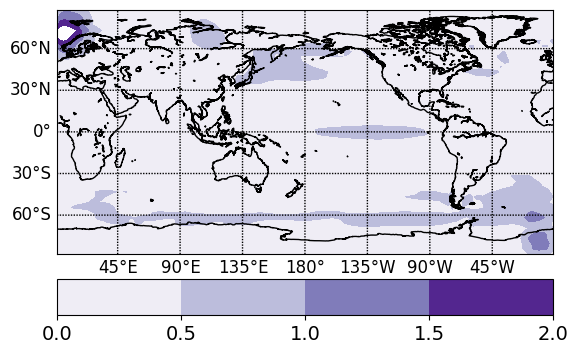

GAN


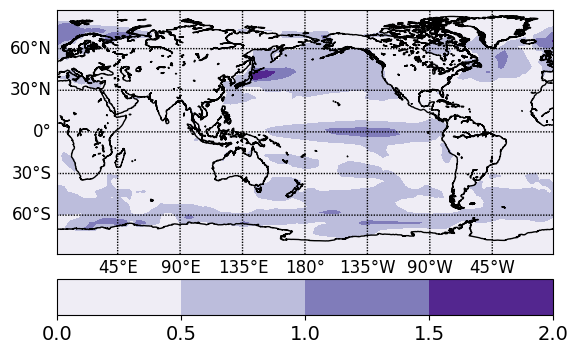

Diffusion


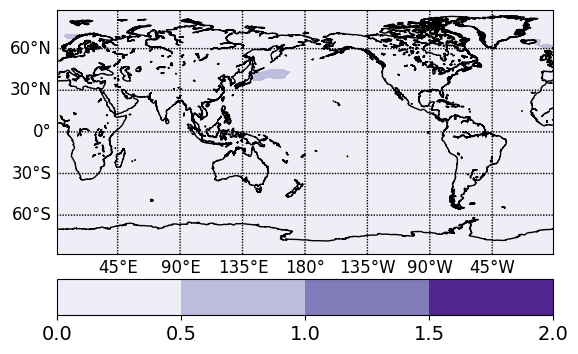

CMIP6


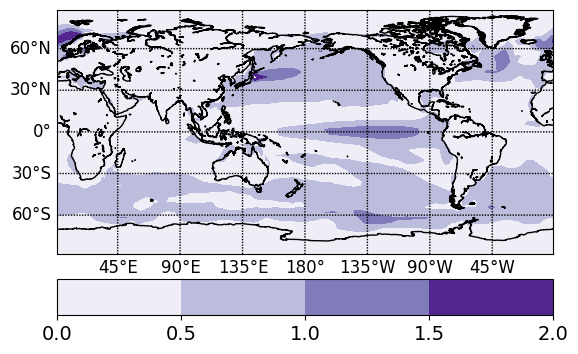

COBE


ValueError: Dimensions ('mon', 'years') not found in data dimensions ('time', 'lat', 'lon')

<Figure size 640x480 with 0 Axes>

In [31]:

def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    #levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    levels = np.linspace(0.0,2.0,5)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Purples')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    cb.ax.tick_params(labelsize=14)  # Increase font size of colorbar ticks
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=12)
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1], fontsize=12)
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()

print('VAE')
plot_map(lon_sst,lat_sst,vae_anom_ds.std(dim=['time'])['sst'].values,'../Data/output/GISS/vae_anomaly_std.png')
print('GAN')
plot_map(lon_sst,lat_sst,gan_anom_ds.std(dim=['years','mon'])['sst'].values,'../Data/output/GISS/gan_anomaly_std.png')
print('Diffusion')
plot_map(lon_sst,lat_sst,diffusion_anom_ds.std(dim=['time'])['sst'].values,'../Data/output/GISS/diffusion_anomaly_std.png')
print('CMIP6')
plot_map(lon_sst,lat_sst,ori_anom_ds.std(dim=['years','mon'])['sst'].values,'../Data/output/GISS/ori_anomaly_std.png')
print('COBE')
plot_map(lon_sst,lat_sst,obs_anom_ds.std(dim=['years','mon'])['sst'].values,'../Data/output/GISS/cobe_anomaly_std.png')


# EOF of Anomaly for 3 months moving average (Figure 7,8,9)

In [10]:
vae_anom_ds_3mo_avg = vae_anom_ds.rolling(time=3, center=True).mean().fillna(0)
diffusion_anom_ds_3mo_avg = diffusion_anom_ds.rolling(time=3, center=True).mean().fillna(0)
da=xr.Dataset(data_vars={'sst': (['time', 'lat', 'lon'], gan_anom_ds.sst.values.reshape(6000,48,144))}, coords={'time': diffusion_anom_ds.time, 'lat': diffusion_anom_ds.lat, 'lon': diffusion_anom_ds.lon})
gan_anom_ds_3mo_avg = da.rolling(time=3, center=True).mean().fillna(0)
da=xr.Dataset(data_vars={'sst': (['time', 'lat', 'lon'], ori_anom_ds.sst.values.reshape(1980,48,144))}, coords={'time': diffusion_anom_ds.time[:1980], 'lat': diffusion_anom_ds.lat, 'lon': diffusion_anom_ds.lon})
ori_anom_ds_3mo_avg = da.rolling(time=3, center=True).mean().fillna(0)
da=xr.Dataset(data_vars={'sst': (['time', 'lat', 'lon'], obs_anom_ds.sst.values.reshape(2088,48,144))}, coords={'time': diffusion_anom_ds.time[:2088], 'lat': diffusion_anom_ds.lat, 'lon': diffusion_anom_ds.lon})
obs_anom_ds_3mo_avg = da.rolling(time=3, center=True).mean().fillna(0)

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 20 22:18:26 2021

@author: Devabrat
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import pylab as pl
from scipy import signal
import matplotlib.pyplot as plt
import scipy.stats
from netCDF4 import Dataset

def cal_power_spect(data):
    #data=N_EP_gen#np.loadtxt('iod.txt', dtype=np.float32)
    #data=data_whole.variables['temp'][:]
    #data=data.reshape(data.shape[0],)

    nd=len(data)


    nrho=len(data)
    rho=0
    sommesup=0
    sommeinf=0
    for i in range(1,nrho):
        j=i-1
        sommesup=sommesup+(data[i]*data[j])
        sommeinf=sommeinf+((data[j]**2))

    rho=sommesup/sommeinf

    nt=len(data)

    rzero=0
    redtab=[]
    red=[]

    srho=np.sqrt(1-rho**2)

    nsim=1500

    red_sum=np.zeros((nd, nsim))
    for i in range(nsim):
    
        white=srho*np.random.randn(1)
        red_sum[0,i]=rho*rzero+white
        
        for j in range(1,nd):
            white=srho*np.random.randn(1)
            red_sum[j,i]=rho*red_sum[j-1,i]+white
            
    redtab.append(red_sum)
        
    redtab=np.array(redtab)
    redtab=redtab.reshape(nd,nsim)


    fs=1
    f, Po = signal.periodogram(data, fs, detrend='linear')

    npo=len(Po)
    Po=Po.reshape(npo,)

    Ax=np.sum(Po)/npo

    red2=[]
    specred=np.zeros((npo,nsim))

    for i in range(nsim):
        red2=redtab[:,i]
        red2m=np.sum(red2)/nd
        red2n=red2-red2m
        fs=1
        fr, Pr = signal.periodogram(red2n, fs, detrend='linear')  #detrend = linear
        npr=len(Pr)
        Pr=Pr.reshape(npr,)
        
        Ar=np.sum(Pr)/npr
        Pr=Pr*(Ax/Ar)
        specred[:,i]=Pr
        
    Mpr=0
    Mspecred=[]
    for i in range(npr):
        Mpr=specred[i,1]
        for j in range(1,nsim):
            Mpr=Mpr+specred[i,j]
        
        Mpr=np.sum(Mpr)/nsim
        Mspecred.append(Mpr)

    Mspecred=np.array(Mspecred)


    period_Po=1/f
    period_Pr=1/fr


    n85=round(1500*85/100)
    n90=round(1500*90/100)
    n95=round(1500*95/100)
    n99=round(1500*99/100)


    tabvecsort=np.zeros((npr,nsim))
    for i in range(npr):
        vec=specred[i,:]
        tabvecsort[i,:]=np.sort(vec)
        
    tabMC=np.zeros((npr,4))

    for i in range(npr):
        tabMC[i,0]=tabvecsort[i,n85]
        tabMC[i,1]=tabvecsort[i,n90]
        tabMC[i,2]=tabvecsort[i,n95]
        tabMC[i,3]=tabvecsort[i,n99]
        

        
    plot=np.zeros((Po.shape[0],3), dtype=np.float32)

    plot[:,0]=period_Po
    plot[:,1]=f*Po
    plot[:,2]=f*tabMC[:,2]
    return plot





VAE


/tmp/ipykernel_788203/152164501.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(Data, weights=wgts)


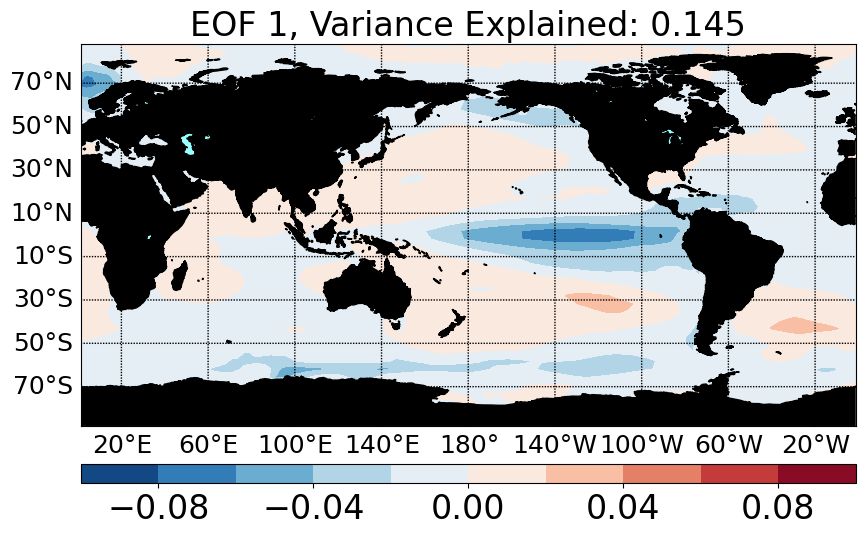

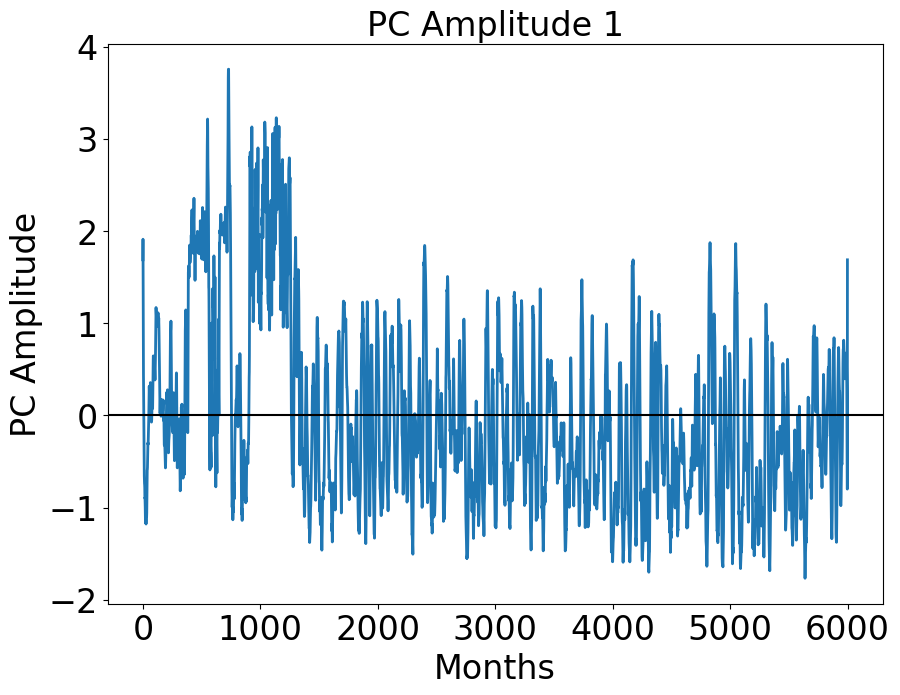

/tmp/ipykernel_788203/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_788203/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_788203/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_788203/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


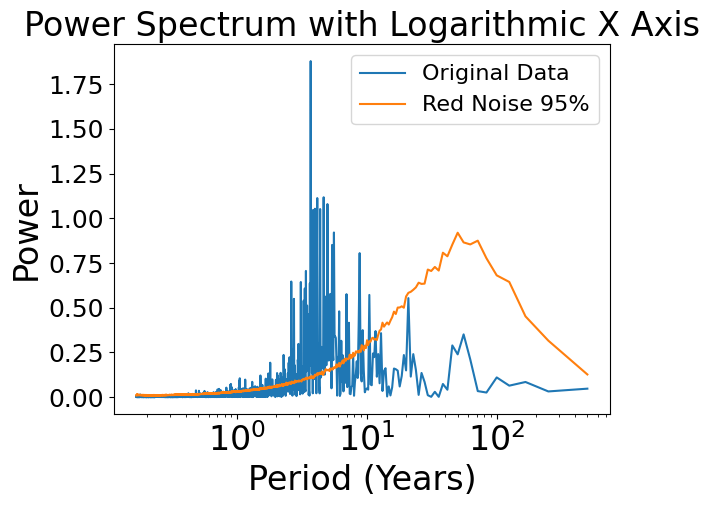

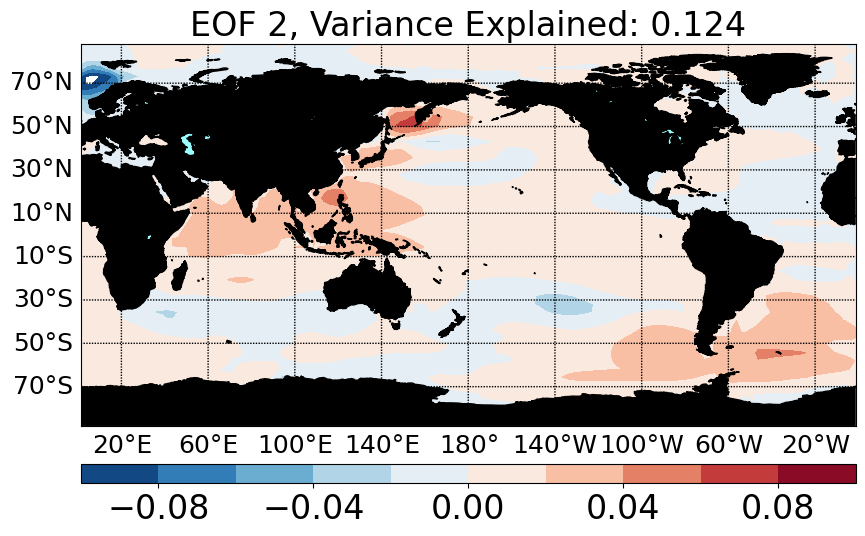

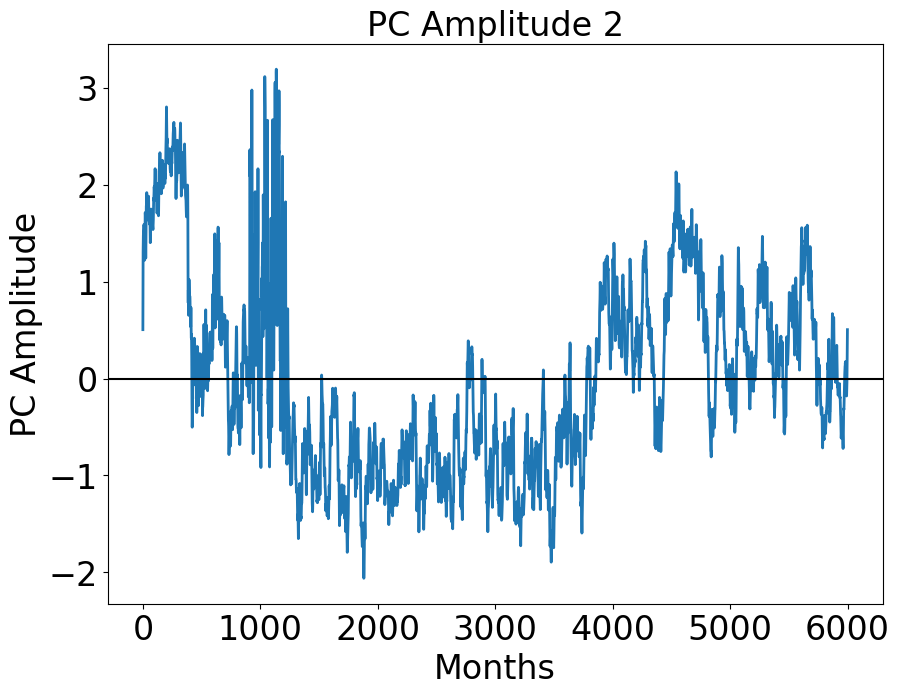

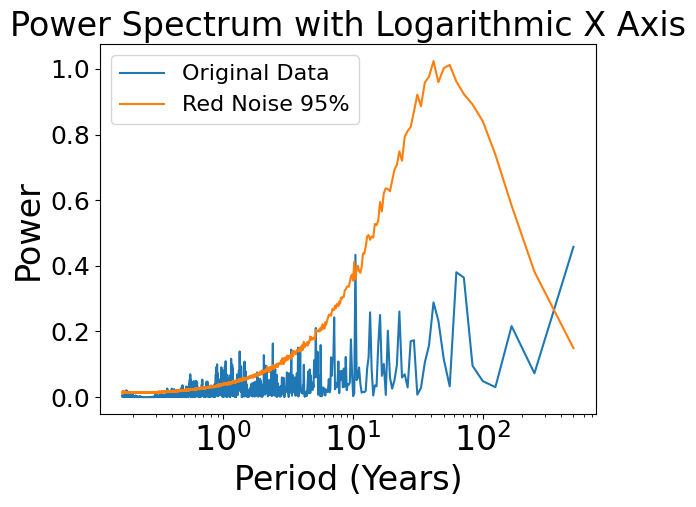

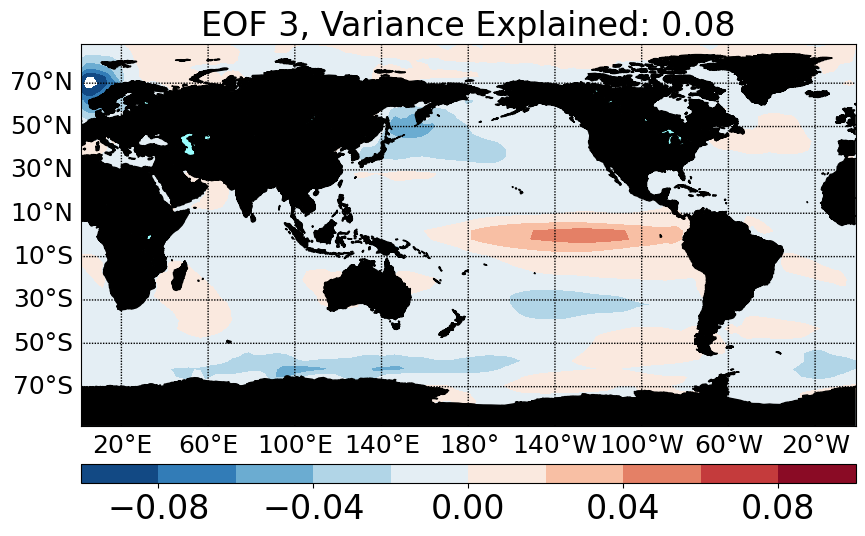

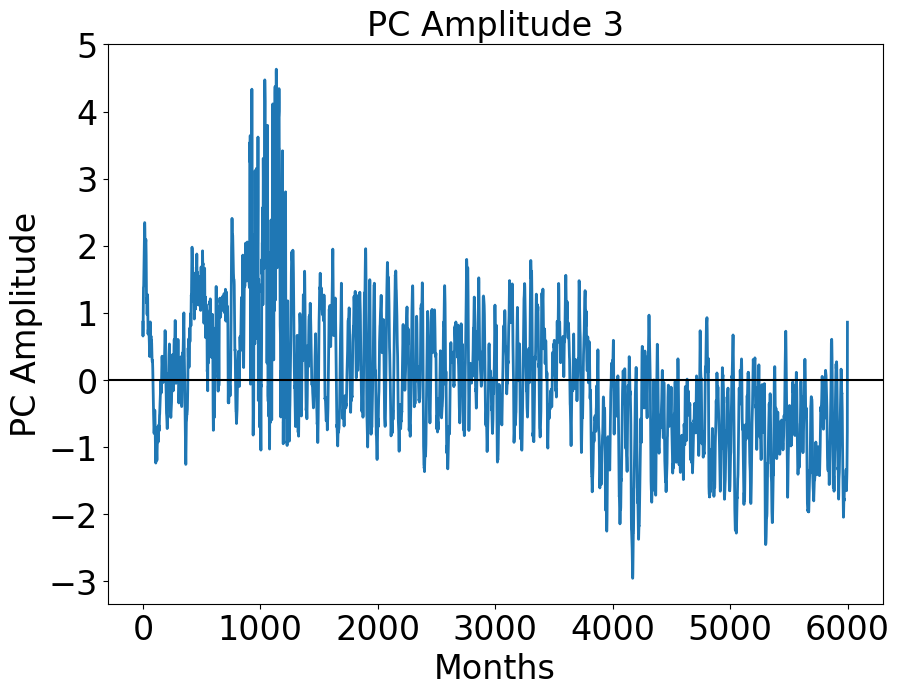

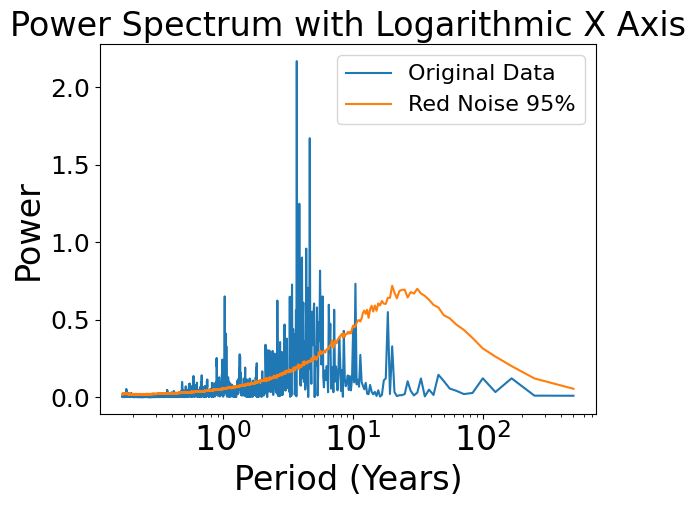

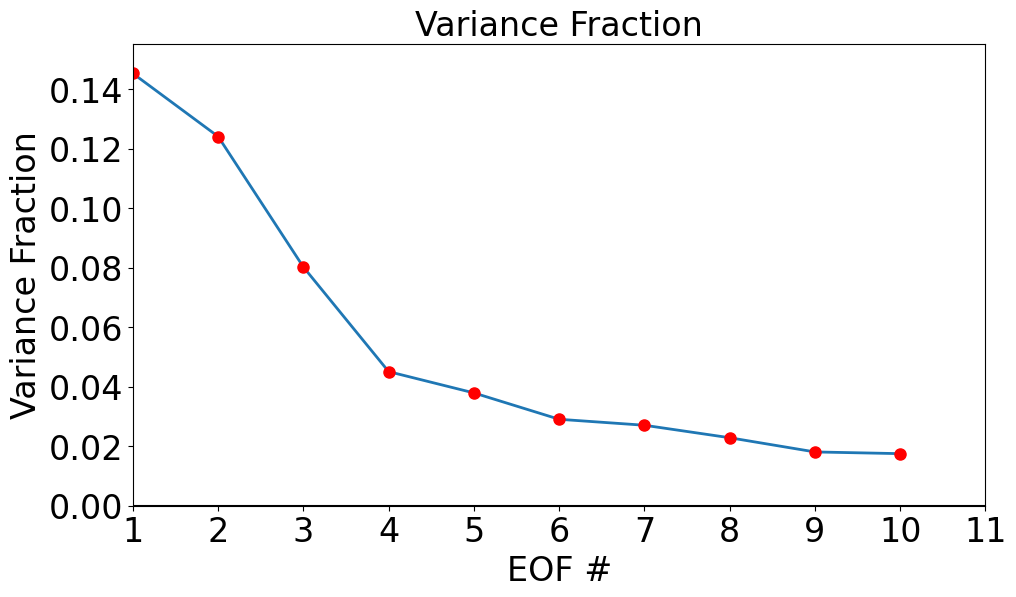

In [36]:
print('VAE')
lat = lat_sst
lon = lon_sst

# Remove all time steps where all values are NaN
sst_data = vae_anom_ds_3mo_avg['sst'].values  # shape: (time, lat, lon)
# Find time indices where not all values are NaN
valid_time_idx = ~np.all(np.isnan(sst_data), axis=(1, 2))
Data = sst_data[valid_time_idx]

wgts = np.cos(np.deg2rad(lat)).reshape(len(lat), 1)
coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(Data, weights=wgts)
eof1 = solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)



for i in range(3):
    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)
    cs = m.contourf(x,y,eof1[i,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=18)
    m.drawmeridians(meridians,labels=[1,0,0,1], fontsize=18)

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    cb.ax.tick_params(labelsize=24)  # Increase font size of colorbar ticks
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF '+str(i+1)+', Variance Explained: '+str(round(varfrac[i],3)), fontsize=24)  
    plt.savefig('../Data/output/GISS/EOF/Eof_vae_anomaly_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Months', fontsize=24)
    plt.ylabel('PC Amplitude', fontsize=24) 
    plt.title('PC Amplitude '+str(i+1), fontsize=24)    
    plt.savefig('../Data/output/GISS/EOF/PC_Amplitude_vae_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()

    plot=cal_power_spect(pc[:,i])
    plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
    plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlabel('Period (Years)', fontsize=24)
    plt.ylabel('Power', fontsize=24)
    plt.legend(fontsize=16)
    plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
    plt.savefig('../Data/output/GISS/EOF/PC_'+str(i+1)+'Pow_Spec_vae.png',dpi=300,bbox_inches='tight')
    plt.show()

plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)
plt.title('Variance Fraction', fontsize=24)  
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_vae_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

GAN


/tmp/ipykernel_788203/1486313671.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver =Eof(Data,weights=wgts)


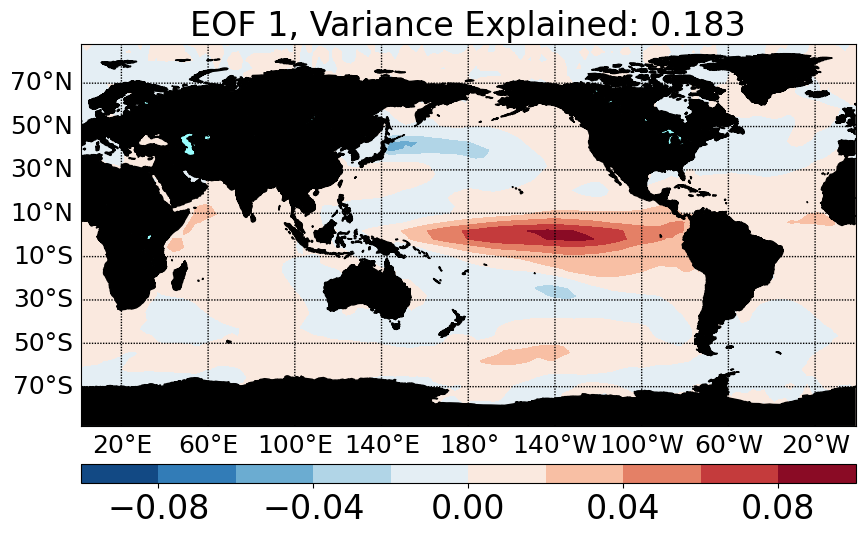

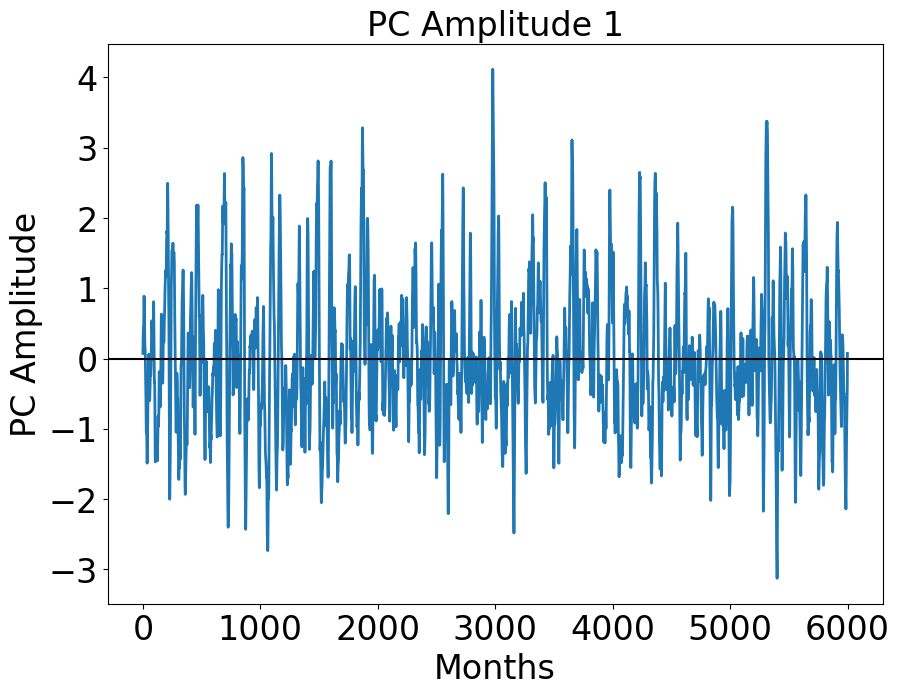

/tmp/ipykernel_788203/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_788203/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_788203/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_788203/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


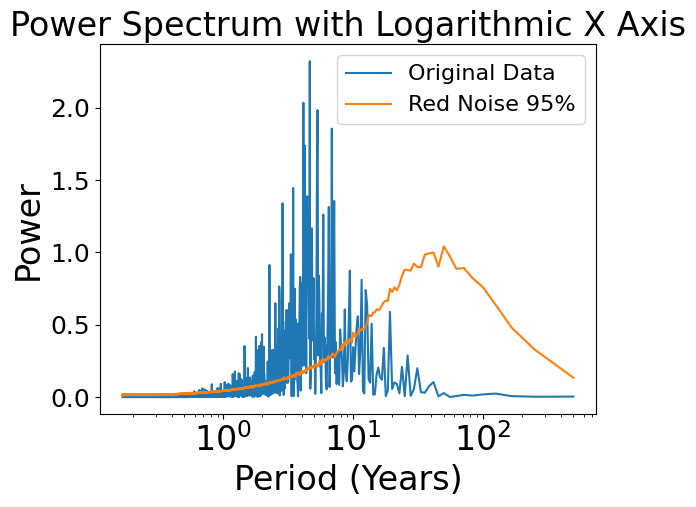

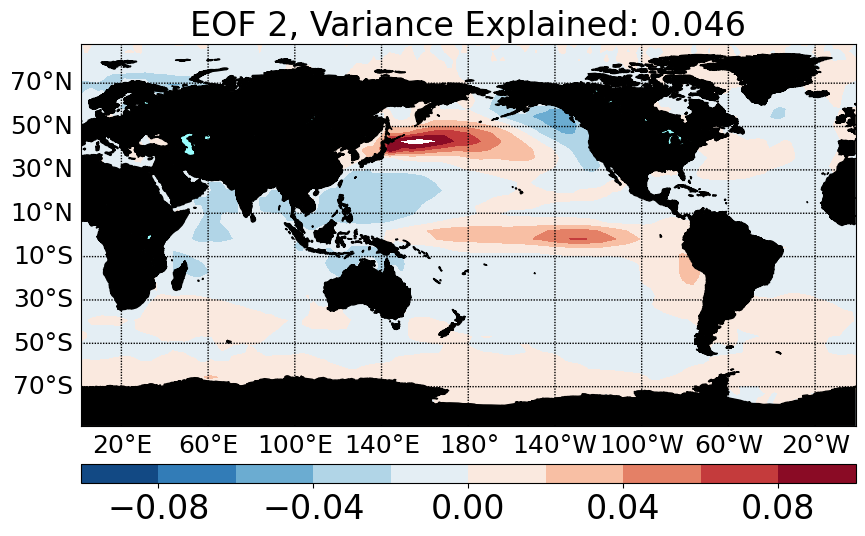

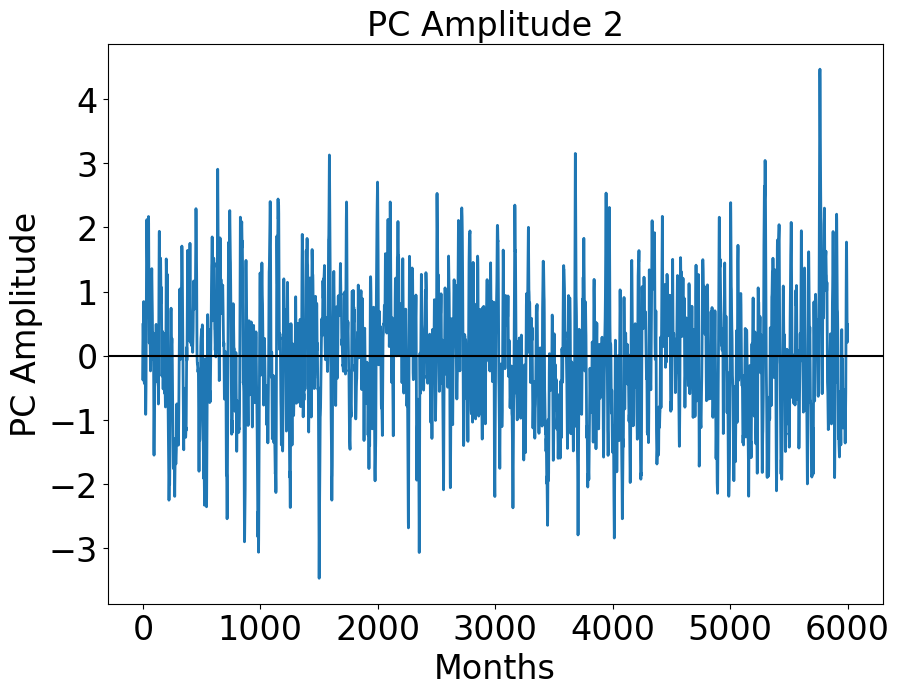

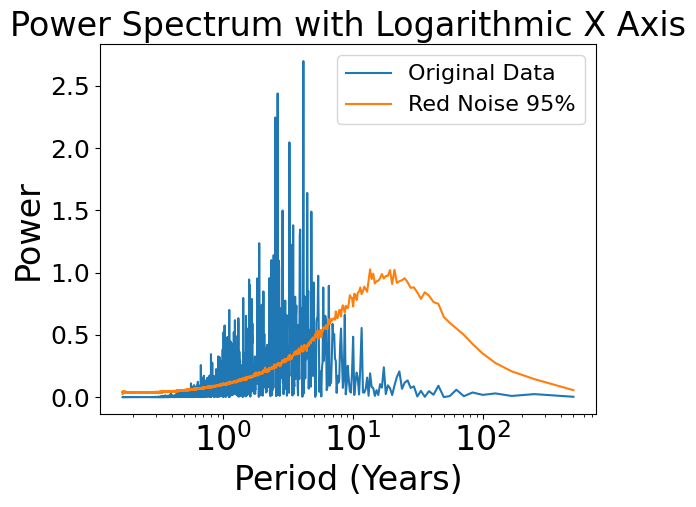

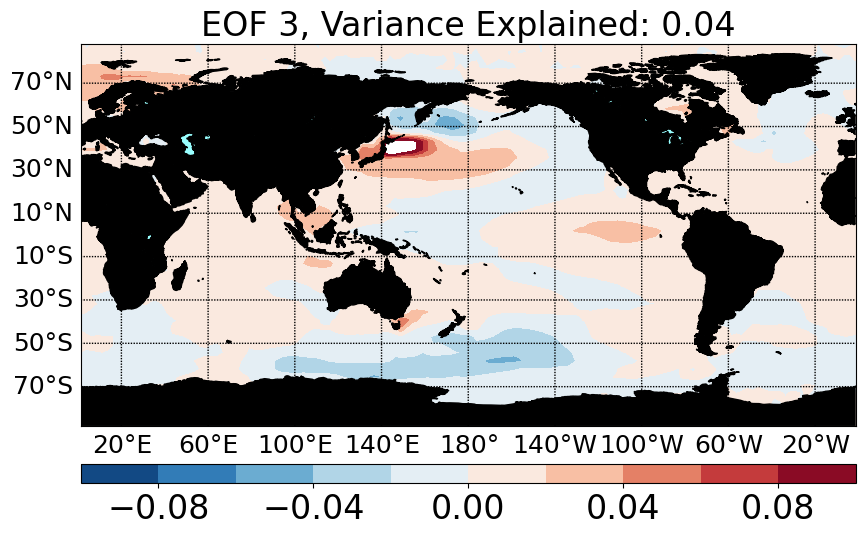

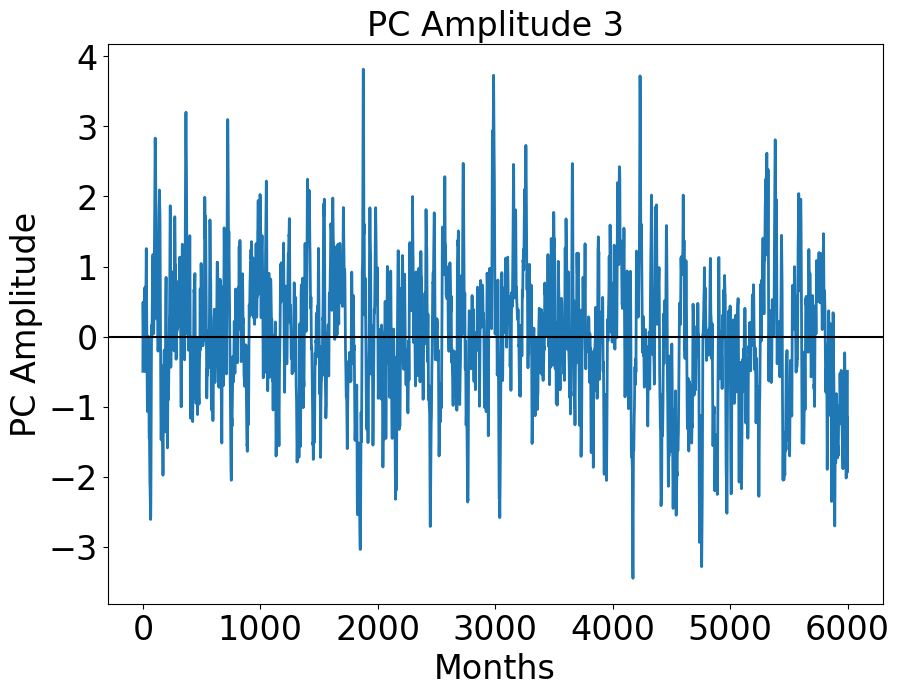

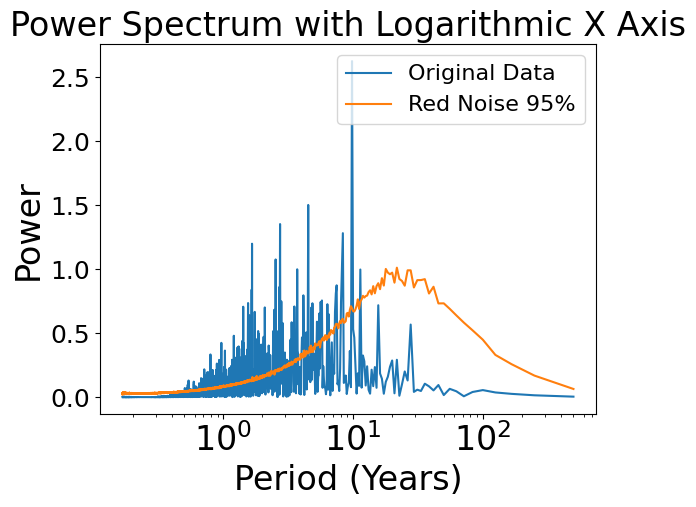

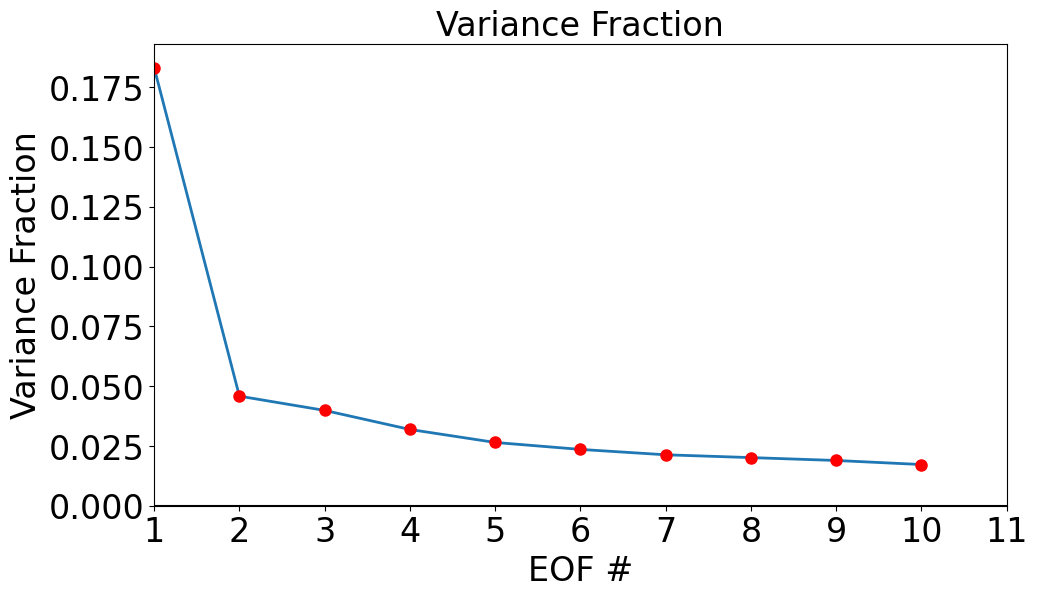

In [45]:
print('GAN')
lat=lat_sst
lon=lon_sst
Data=gan_anom_ds_3mo_avg.fillna(0)['sst'].values.reshape(6000,48,144)#[:6000]
wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.reshape(len(wgts), 1)
#solver1 = Eof(np.array(ser_original[6]), weights=wgts)

coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver =Eof(Data,weights=wgts)
eof1=solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)



for i in range(3):
    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)
    cs = m.contourf(x,y,eof1[i,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=18)
    m.drawmeridians(meridians,labels=[1,0,0,1], fontsize=18)

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    cb.ax.tick_params(labelsize=24)  # Increase font size of colorbar ticks
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF '+str(i+1)+', Variance Explained: '+str(round(varfrac[i],3)), fontsize=24)  
    plt.savefig('../Data/output/GISS/EOF/Eof_gan_anomaly_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Months', fontsize=24)
    plt.ylabel('PC Amplitude', fontsize=24) 
    plt.title('PC Amplitude '+str(i+1), fontsize=24)    
    plt.savefig('../Data/output/GISS/EOF/PC_Amplitude_gan_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()

    plot=cal_power_spect(pc[:,i])
    plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
    plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlabel('Period (Years)', fontsize=24)
    plt.ylabel('Power', fontsize=24)
    plt.legend(fontsize=16)
    plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
    plt.savefig('../Data/output/GISS/EOF/PC_'+str(i+1)+'Pow_Spec_gan.png',dpi=300,bbox_inches='tight')
    plt.show()

plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)
plt.title('Variance Fraction', fontsize=24)  
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_gan_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

Diffusion


/tmp/ipykernel_260368/383173399.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver =Eof(Data,weights=wgts)


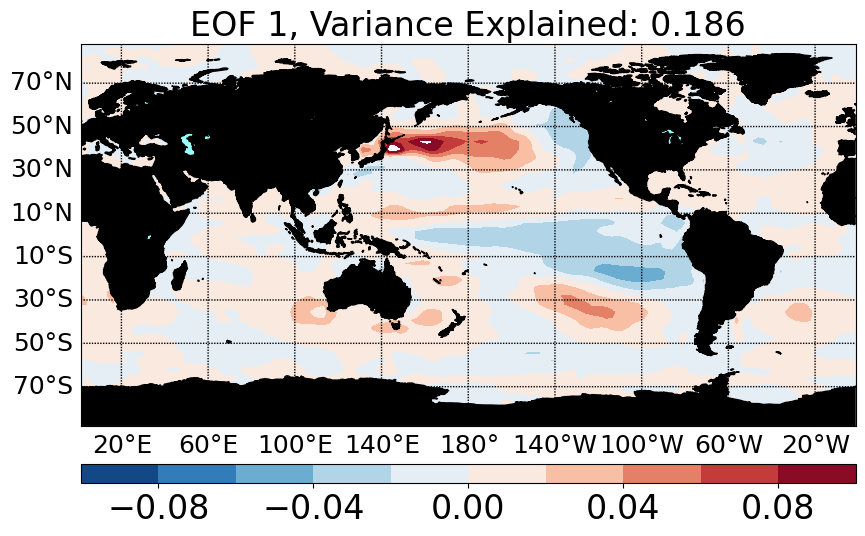

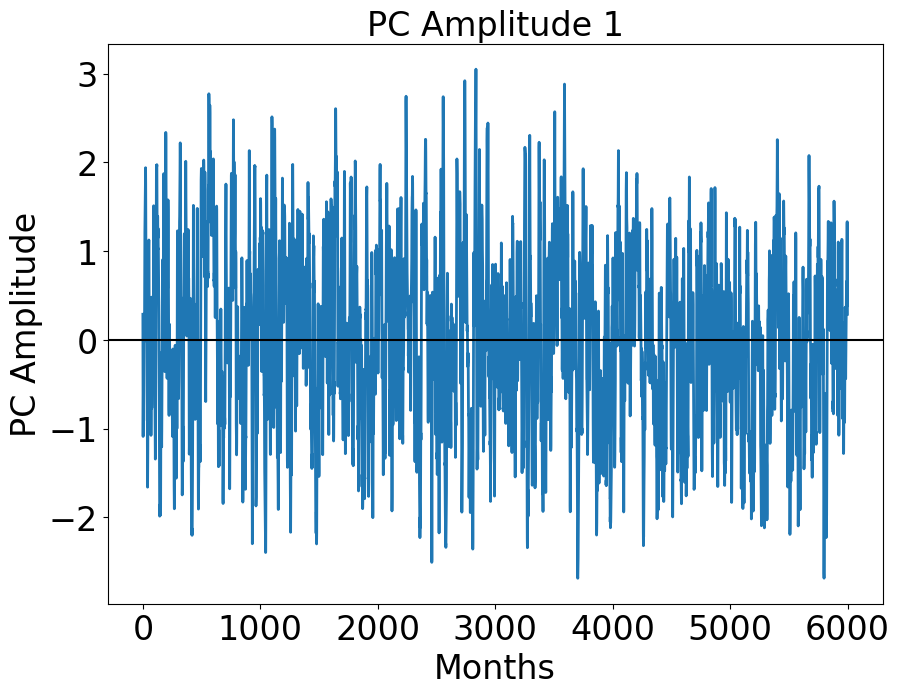

/tmp/ipykernel_260368/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_260368/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_260368/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_260368/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


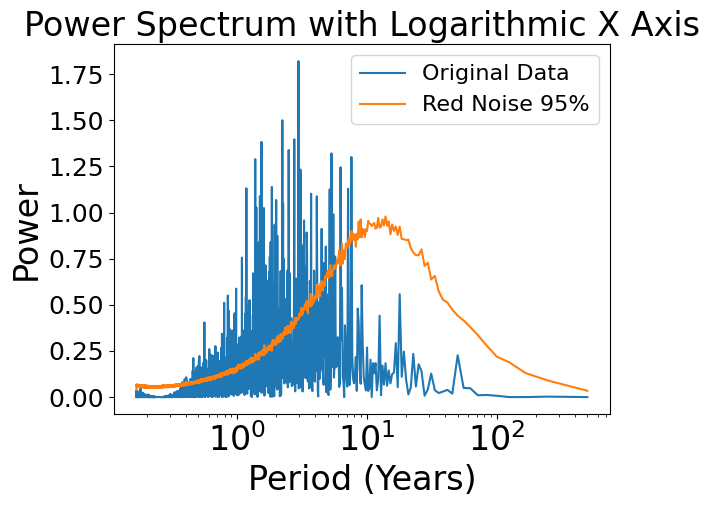

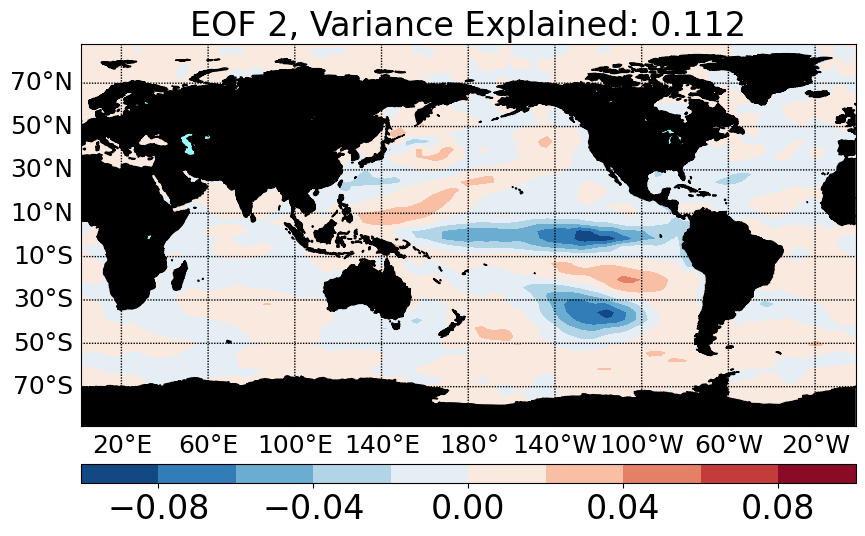

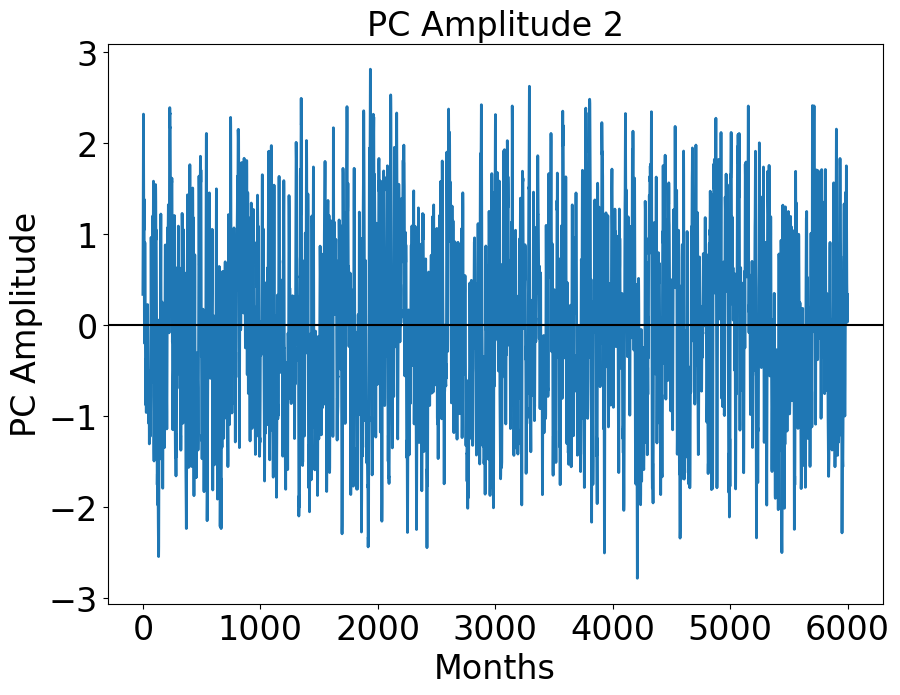

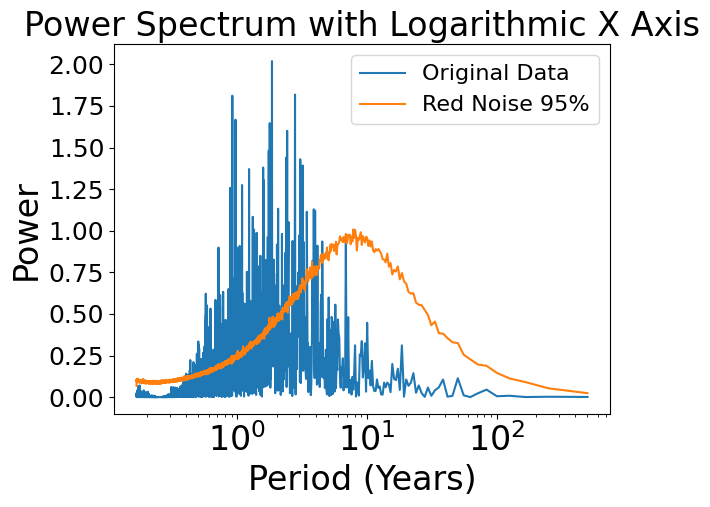

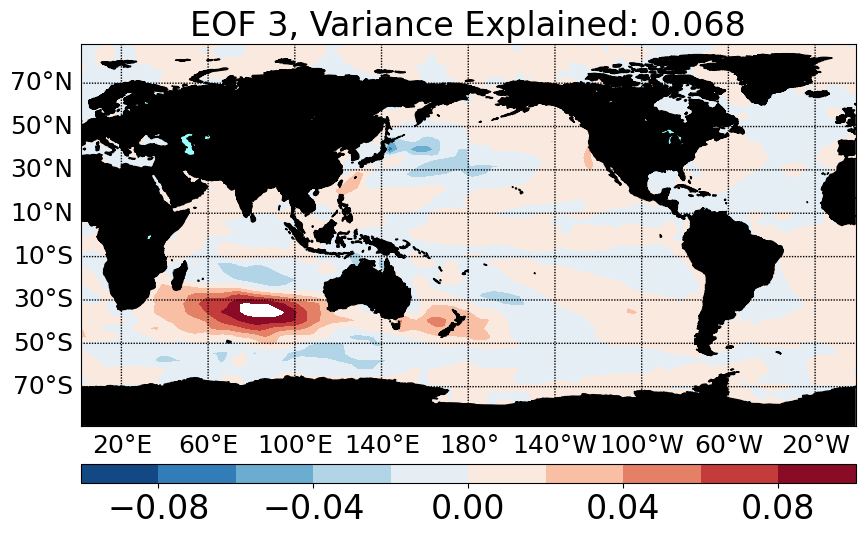

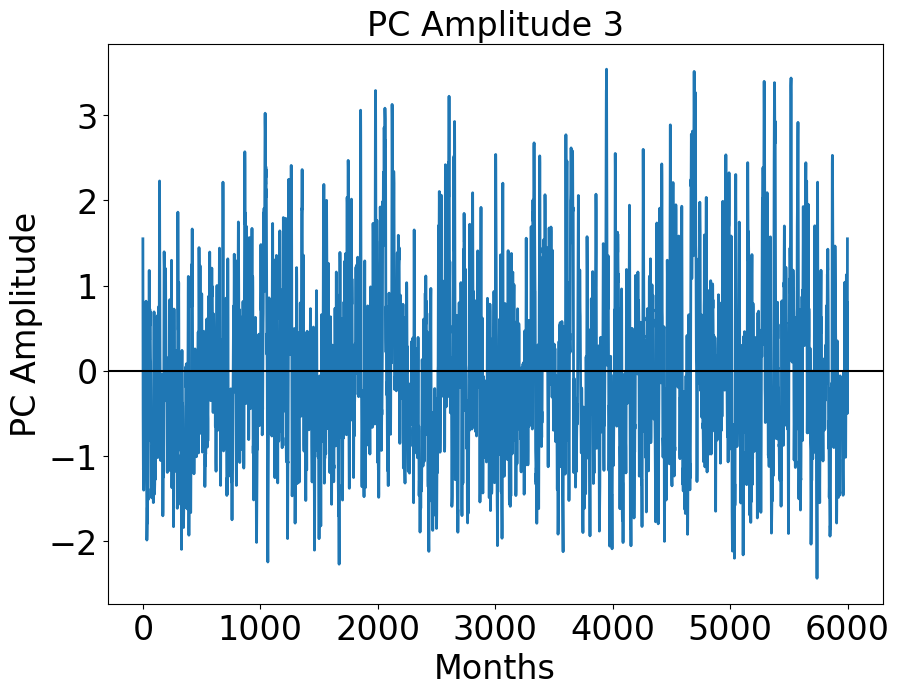

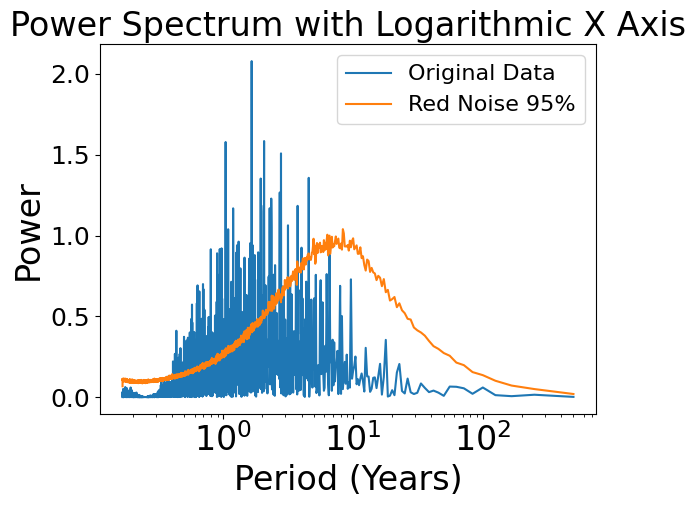

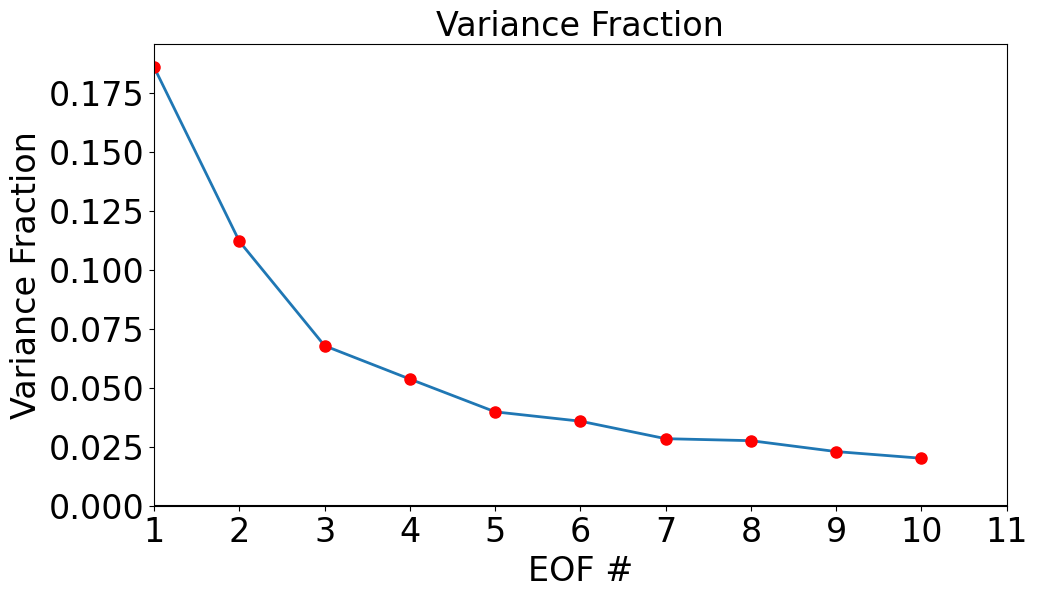

In [12]:
print('Diffusion')
lat=lat_sst
lon=lon_sst
Data=diffusion_anom_ds_3mo_avg.fillna(0)['sst'].values.reshape(6000,48,144)#[:6000]
wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.reshape(len(wgts), 1)
#solver1 = Eof(np.array(ser_original[6]), weights=wgts)

coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver =Eof(Data,weights=wgts)
eof1=solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)



for i in range(3):
    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)
    cs = m.contourf(x,y,eof1[i,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=18)
    m.drawmeridians(meridians,labels=[1,0,0,1], fontsize=18)

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    cb.ax.tick_params(labelsize=24)  # Increase font size of colorbar ticks
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF '+str(i+1)+', Variance Explained: '+str(round(varfrac[i],3)), fontsize=24)  
    plt.savefig('../Data/output/GISS/EOF/Eof_diffusion_anomaly_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Months', fontsize=24)
    plt.ylabel('PC Amplitude', fontsize=24) 
    plt.title('PC Amplitude '+str(i+1), fontsize=24)    
    plt.savefig('../Data/output/GISS/EOF/PC_Amplitude_diffusion_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()

    plot=cal_power_spect(pc[:,i])
    plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
    plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlabel('Period (Years)', fontsize=24)
    plt.ylabel('Power', fontsize=24)
    plt.legend(fontsize=16)
    plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
    plt.savefig('../Data/output/GISS/EOF/PC_'+str(i+1)+'Pow_Spec_diffusion.png',dpi=300,bbox_inches='tight')
    plt.show()

plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)
plt.title('Variance Fraction', fontsize=24)  
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_diffusion_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

GISS


/tmp/ipykernel_788203/3477662107.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver =Eof(Data,weights=wgts)


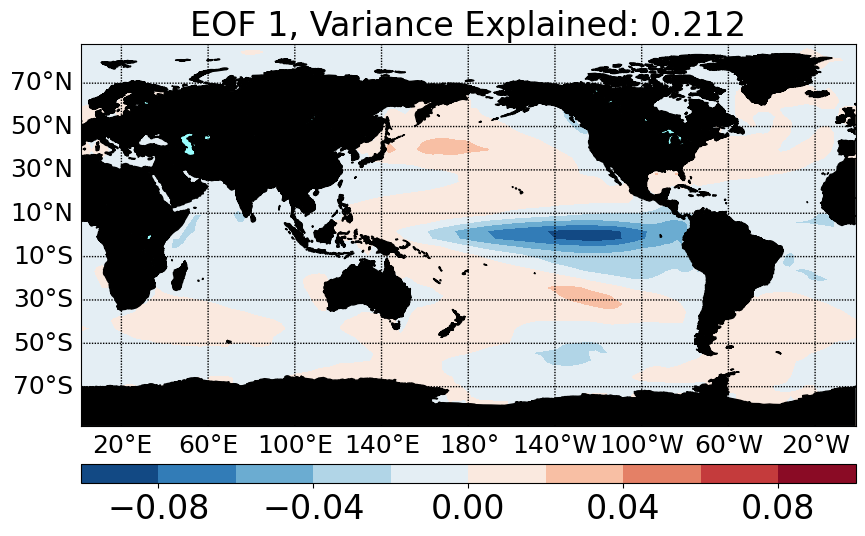

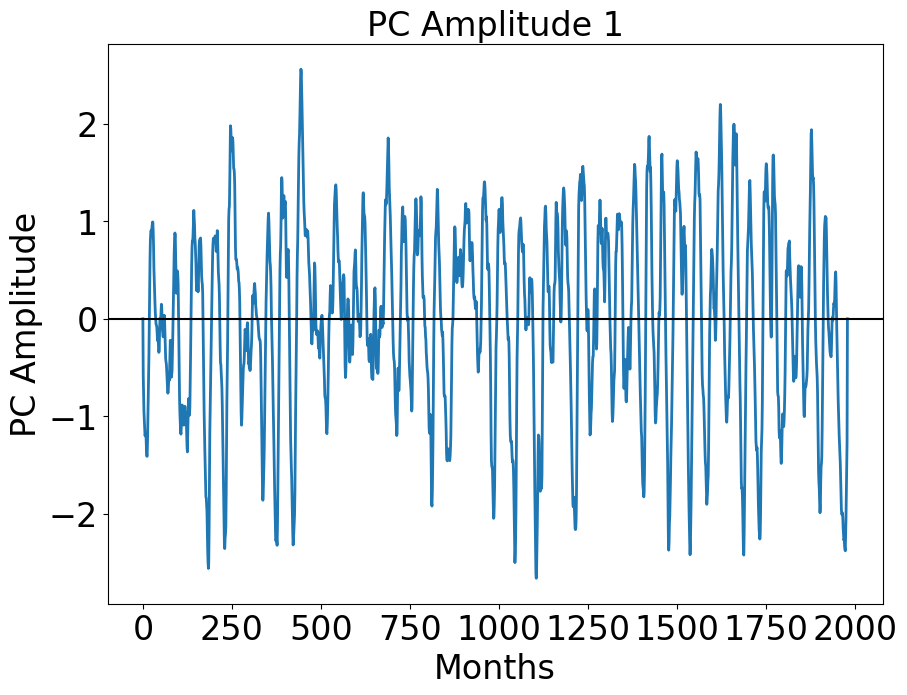

/tmp/ipykernel_788203/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_788203/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_788203/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_788203/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


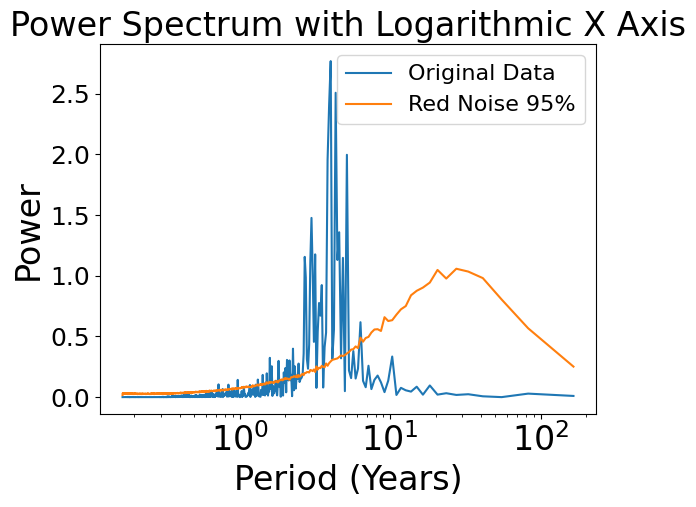

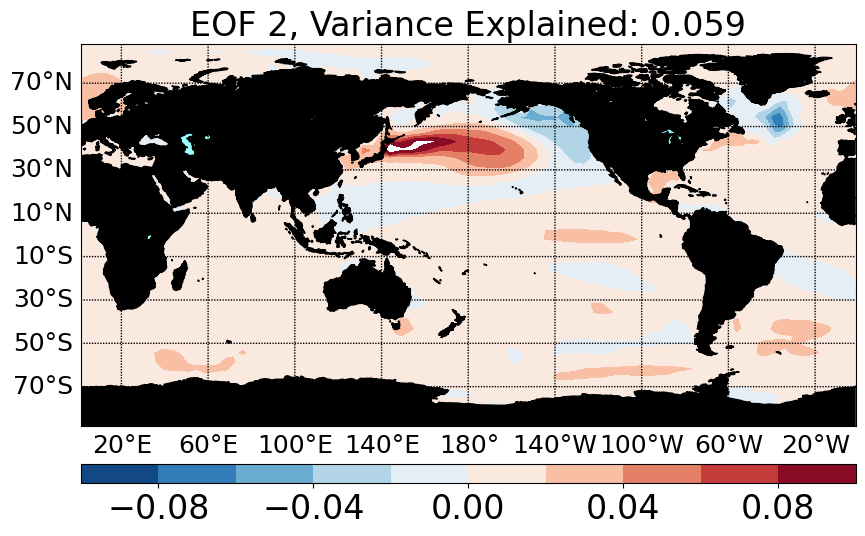

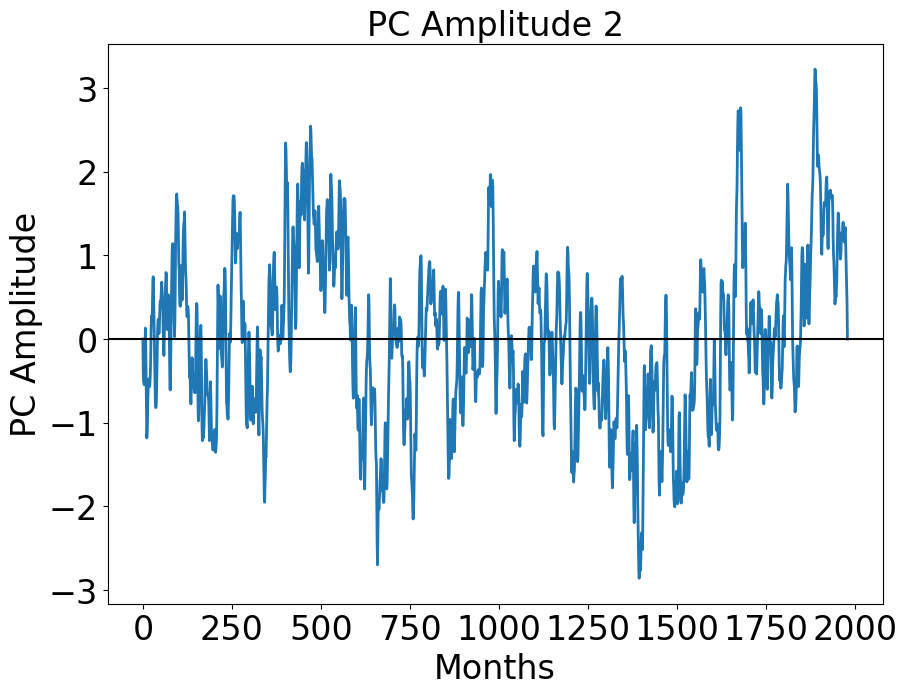

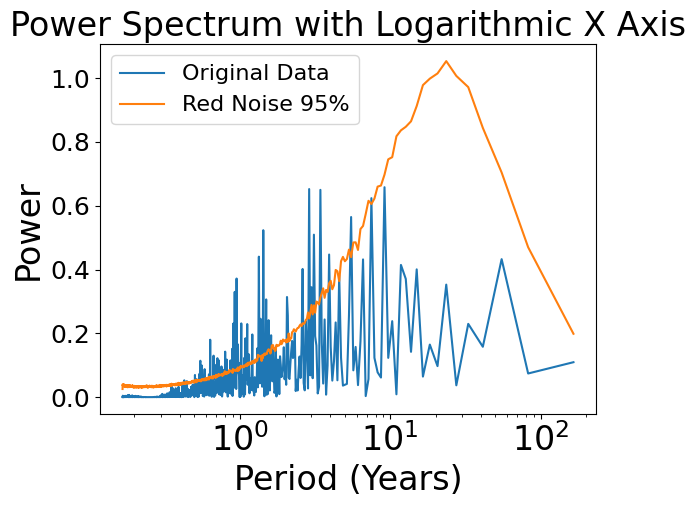

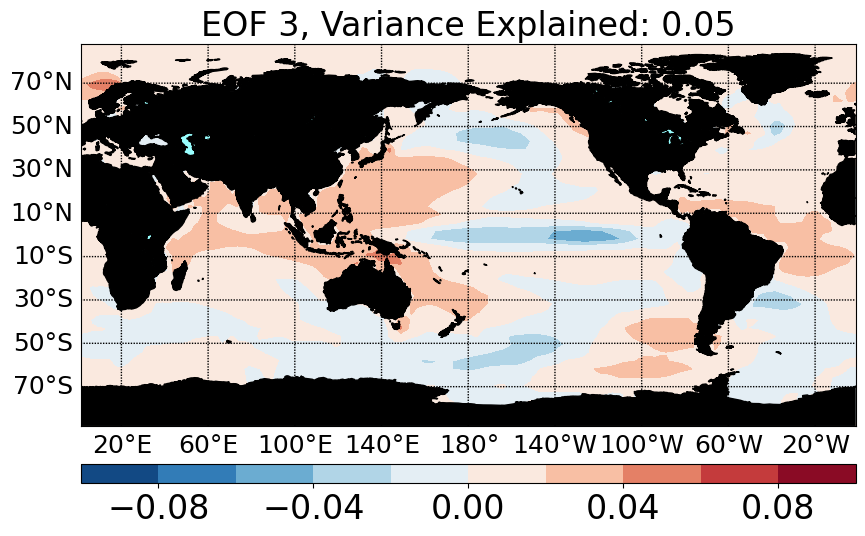

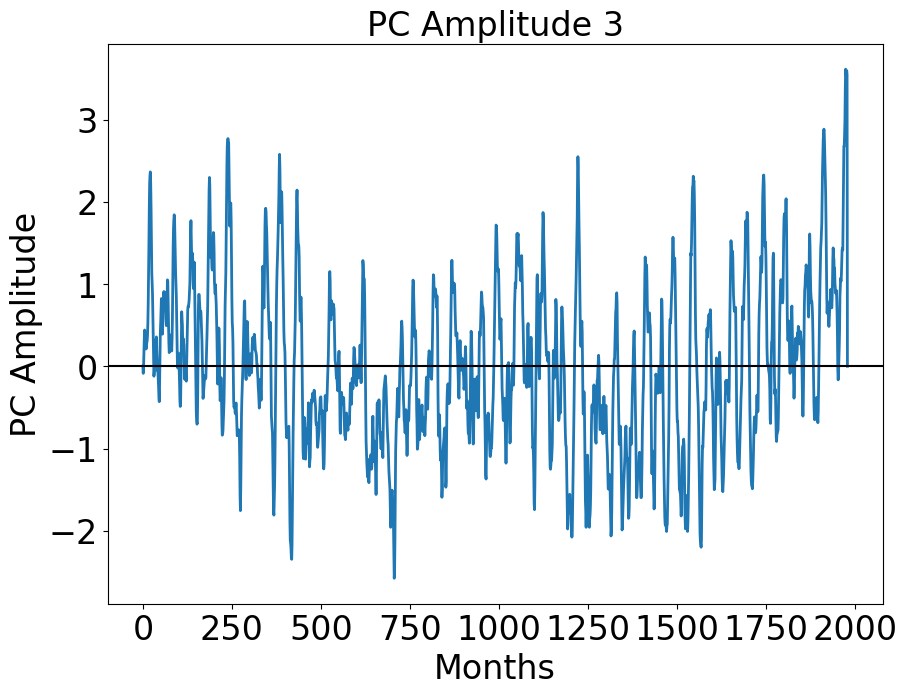

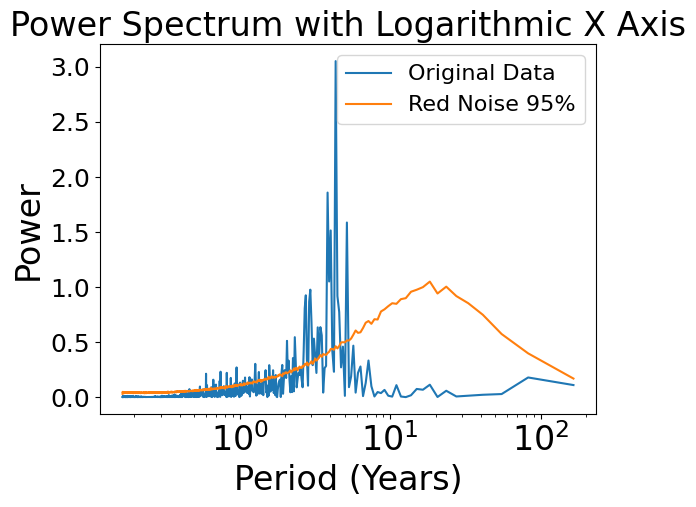

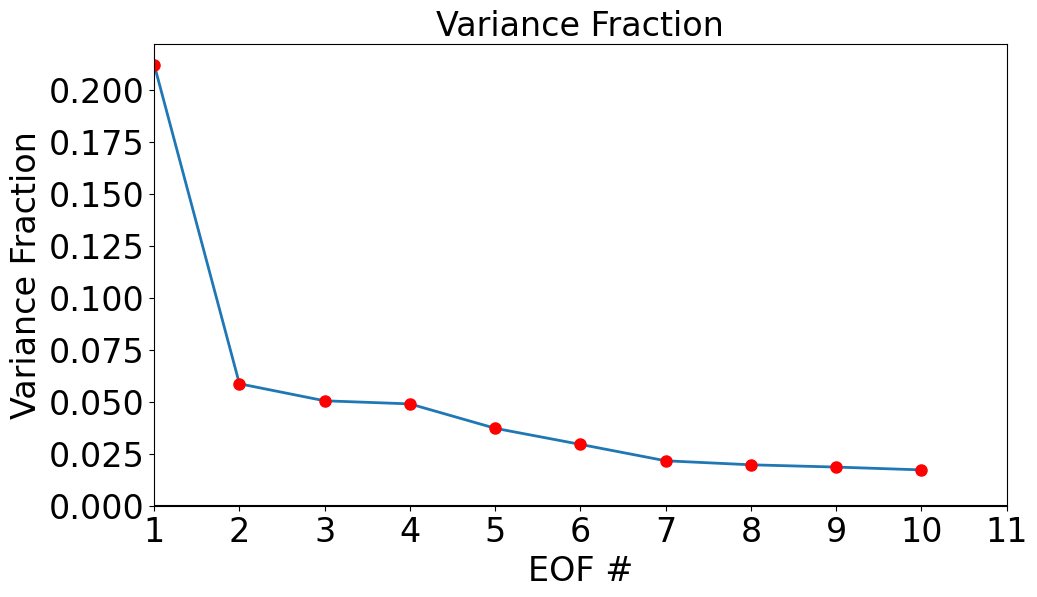

In [47]:
print('GISS')
lat=lat_sst
lon=lon_sst
Data=ori_anom_ds_3mo_avg.fillna(0)['sst'].values.reshape(1980,48,144)#[:6000]
wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.reshape(len(wgts), 1)
#solver1 = Eof(np.array(ser_original[6]), weights=wgts)

coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver =Eof(Data,weights=wgts)
eof1=solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)



for i in range(3):
    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)
    cs = m.contourf(x,y,eof1[i,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=18)
    m.drawmeridians(meridians,labels=[1,0,0,1], fontsize=18)

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    cb.ax.tick_params(labelsize=24)  # Increase font size of colorbar ticks
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF '+str(i+1)+', Variance Explained: '+str(round(varfrac[i],3)), fontsize=24)  
    plt.savefig('../Data/output/GISS/EOF/Eof_diffusion_anomaly_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Months', fontsize=24)
    plt.ylabel('PC Amplitude', fontsize=24) 
    plt.title('PC Amplitude '+str(i+1), fontsize=24)    
    plt.savefig('../Data/output/GISS/EOF/PC_Amplitude_diffusion_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()

    plot=cal_power_spect(pc[:,i])
    plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
    plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlabel('Period (Years)', fontsize=24)
    plt.ylabel('Power', fontsize=24)
    plt.legend(fontsize=16)
    plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
    plt.savefig('../Data/output/GISS/EOF/PC_'+str(i+1)+'Pow_Spec_diffusion.png',dpi=300,bbox_inches='tight')
    plt.show()

plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)
plt.title('Variance Fraction', fontsize=24)  
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_diffusion_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

# ONI

In [13]:
ONI_vae_3mo_avg = vae_anom_ds_3mo_avg.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])
ONI_diffusion_3mo_avg = diffusion_anom_ds_3mo_avg.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])
ONI_gan_3mo_avg = gan_anom_ds_3mo_avg.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])
ONI_ori_3mo_avg = ori_anom_ds_3mo_avg.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])
ONI_obs_3mo_avg = obs_anom_ds_3mo_avg.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])

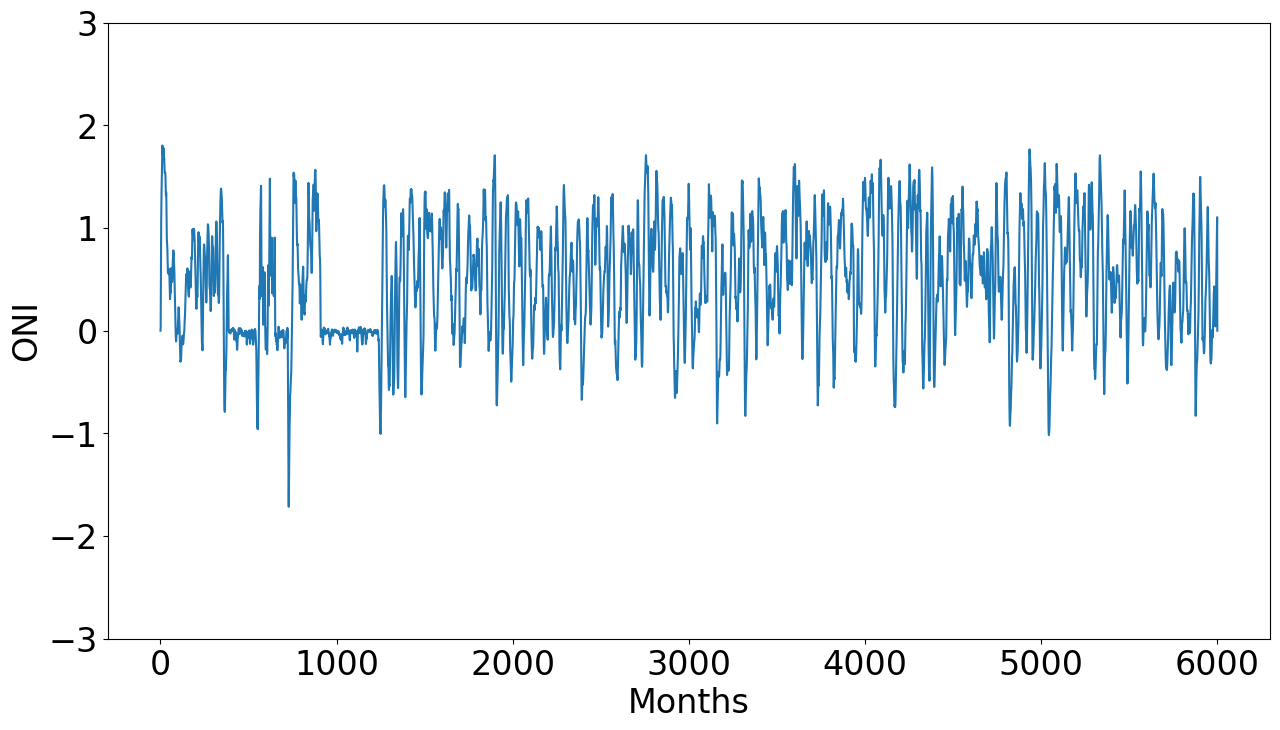

In [14]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_vae_3mo_avg.values.reshape(6000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')
plt.ylim(-3,3)
plt.xlabel('Months',fontsize=24)
plt.ylabel('ONI',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_vae.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_3557794/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_3557794/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white


/tmp/ipykernel_3557794/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_3557794/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


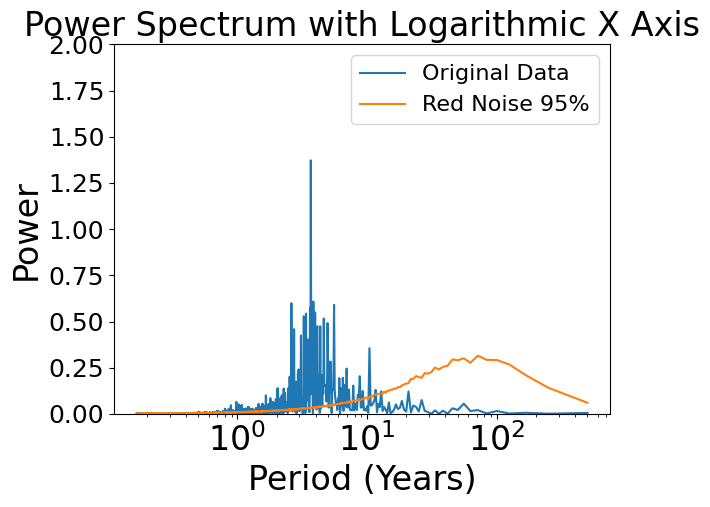

In [10]:
plot=cal_power_spect(ONI_vae_3mo_avg.values.reshape(6000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.ylim(0,2)
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_vae.png',dpi=300,bbox_inches='tight')
plt.show()

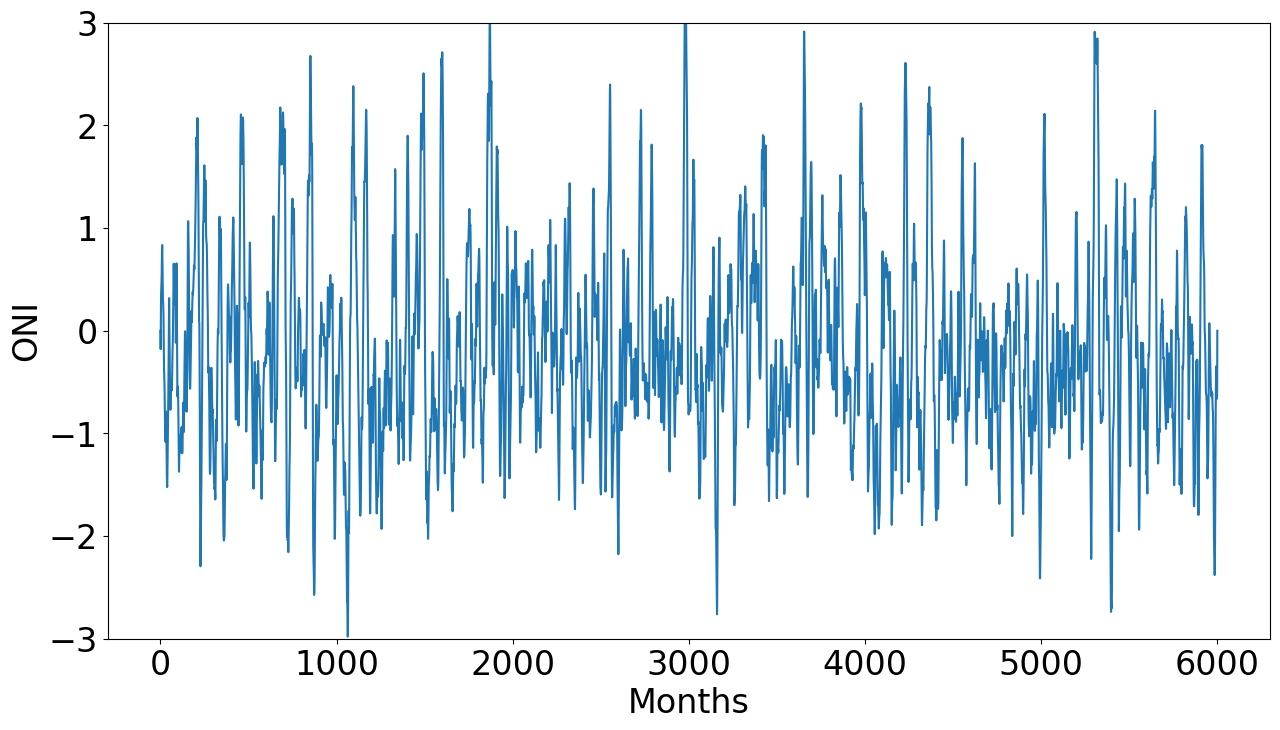

In [23]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_gan_3mo_avg.values.reshape(6000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')
plt.ylim(-3,3)
plt.xlabel('Months',fontsize=24)
plt.ylabel('ONI',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_gan.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_3557794/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_3557794/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white


/tmp/ipykernel_3557794/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_3557794/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


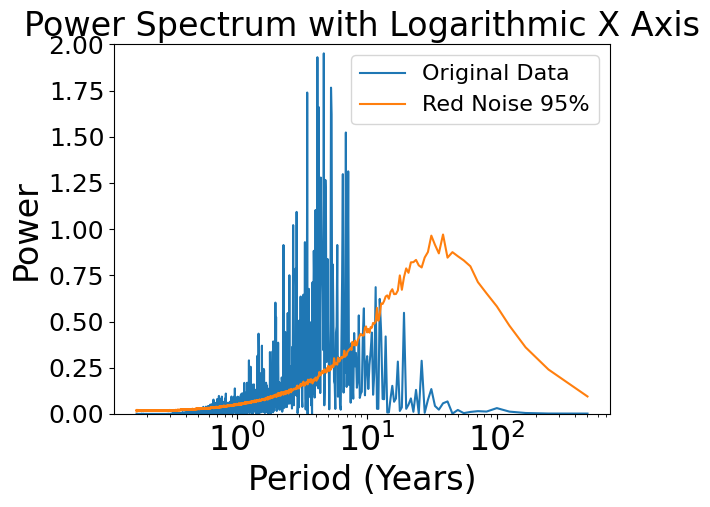

In [24]:
plot=cal_power_spect(ONI_gan_3mo_avg.values.reshape(6000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.ylim(0,2)
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_gan.png',dpi=300,bbox_inches='tight')
plt.show()

In [29]:
ONI_diffusion_3mo_avg.std()
ONI_gan_3mo_avg.std()
ONI_vae_3mo_avg.std()

<xarray.DataArray 'sst' ()> Size: 4B
array(0.5567061, dtype=float32)

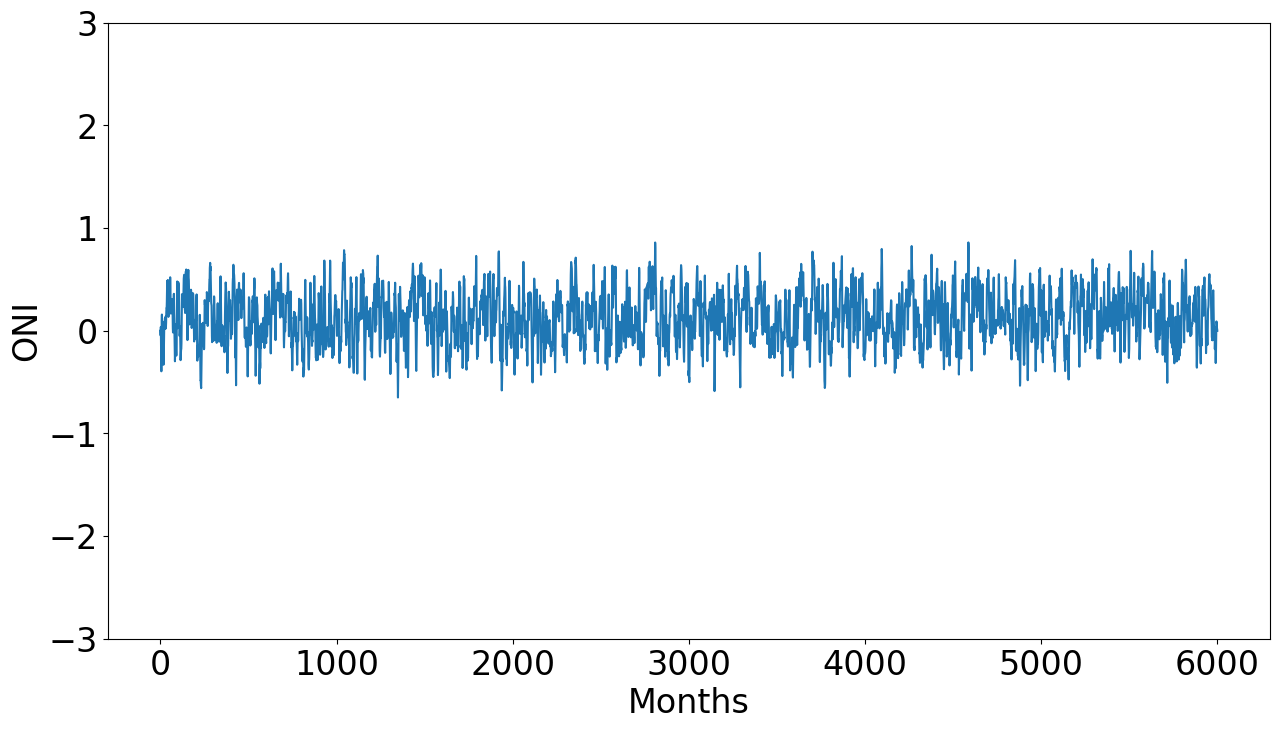

In [15]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_diffusion_3mo_avg.values.reshape(6000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')
plt.ylim(-3,3)
plt.xlabel('Months',fontsize=24)
plt.ylabel('ONI',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_diffusion.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_260368/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_260368/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white


/tmp/ipykernel_260368/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_260368/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


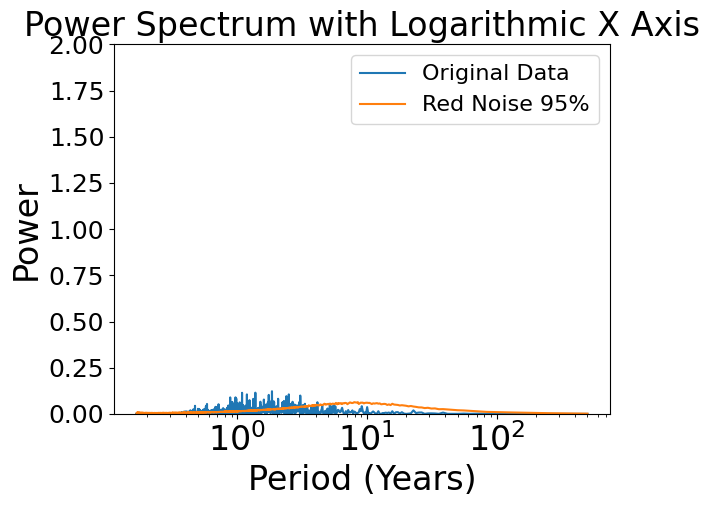

In [16]:
plot=cal_power_spect(ONI_diffusion_3mo_avg.values.reshape(6000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.ylim(0,2)
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_diffusion.png',dpi=300,bbox_inches='tight')
plt.show()

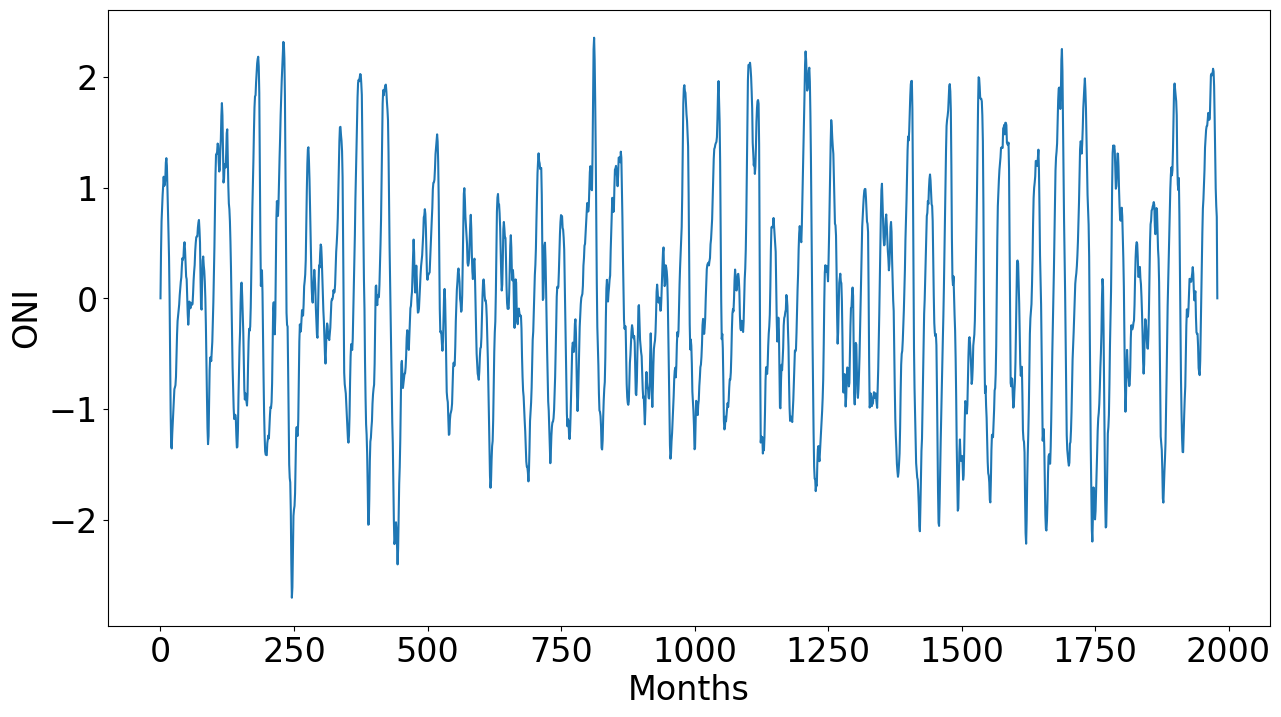

In [25]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_ori_3mo_avg.values.reshape(1980))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=24)
plt.ylabel('ONI',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_ori.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_3557794/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_3557794/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white


/tmp/ipykernel_3557794/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_3557794/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


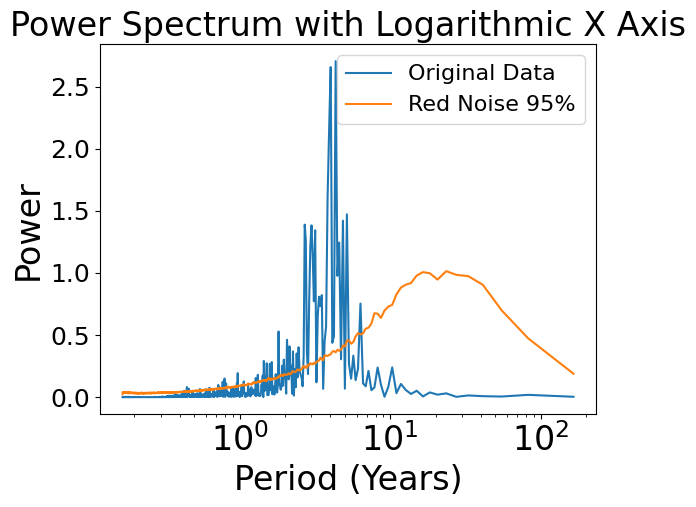

In [26]:
plot=cal_power_spect(ONI_ori_3mo_avg.values.reshape(1980))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_ori.png',dpi=300,bbox_inches='tight')
plt.show()

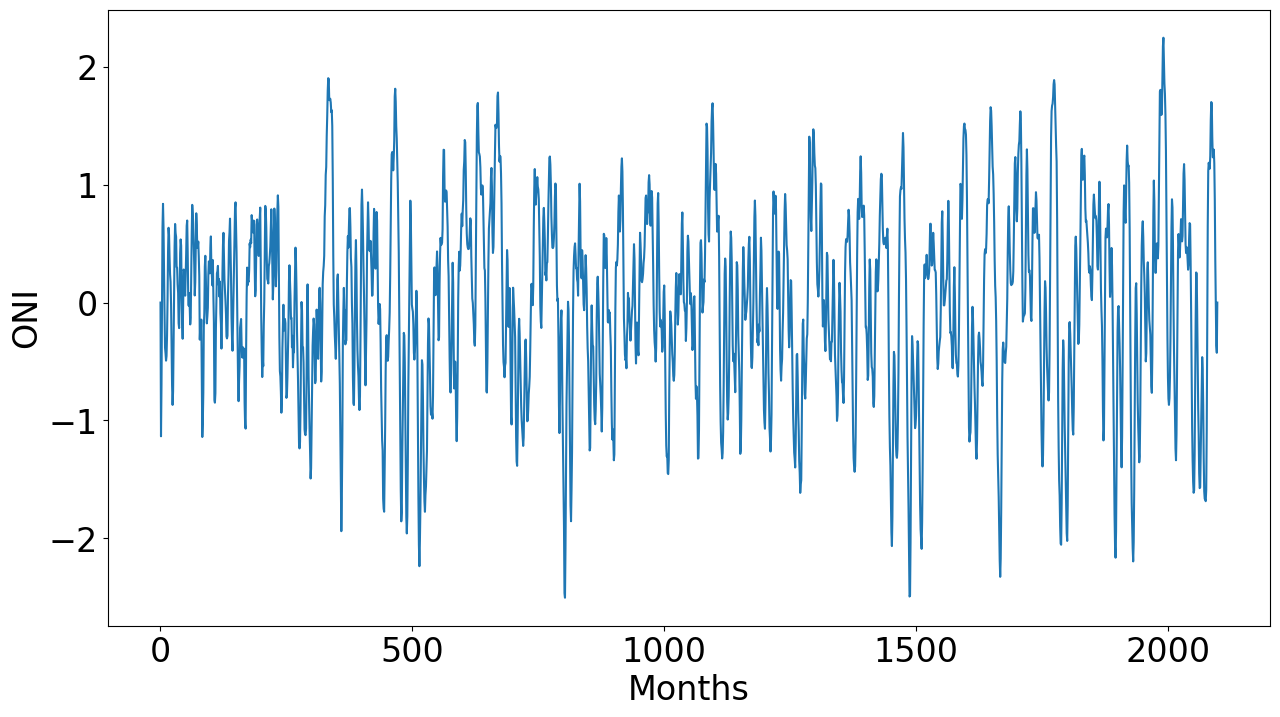

In [ ]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_obs_3mo_avg.values.reshape(2099))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=24)
plt.ylabel('ONI',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_obs.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_788203/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_788203/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white


/tmp/ipykernel_788203/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_788203/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


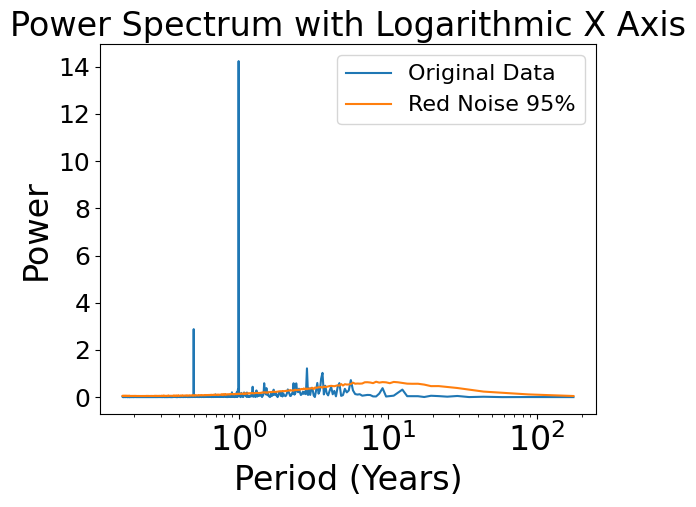

In [ ]:
plot=cal_power_spect(ONI_obs_3mo_avg.values.reshape(2099))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_obs.png',dpi=300,bbox_inches='tight')
plt.show()